# Análisis Exploratorio de Datos

El Análisis Exploratorio de Datos (EDA) constituye una etapa fundamental en toda investigación estadística, ya que permite comprender las características principales del conjunto de datos, identificar patrones, detectar posibles inconsistencias y orientar la preparación de la información antes del modelado.

En este estudio, el EDA tiene como propósito examinar los registros de suicidios en Colombia durante el periodo 2015–2023, con el fin de describir las variables sociodemográficas y contextuales asociadas y evaluar la calidad de los datos para la construcción de un modelo de regresión XGBoost Regressor.

En primer lugar, se realiza una revisión general del dataset, verificando el número de observaciones, la disponibilidad de variables y la presencia de valores faltantes o categorías indeterminadas. Posteriormente, se lleva a cabo un análisis univariado, en el que se describen la distribución de la variable dependiente (mecanismo de suicidio: generadores de asfixia vs otros) y de las principales variables independientes (sexo, edad, estado civil, escolaridad, escenario, zona, entre otras).

En una segunda fase, se desarrolla un análisis bivariado, explorando las asociaciones preliminares entre el mecanismo de suicidio y las variables sociodemográficas/contextuales. Esto incluye el uso de tablas de contingencia, gráficos comparativos y estimaciones de razones de momios (odds ratios) crudas en variables binarias.

Finalmente, a partir de los hallazgos del EDA, se definen las decisiones de recodificación, agrupación y preparación de variables que alimentarán el modelo de regresión XGBoost Regressor, asegurando la validez y consistencia de los resultados.

# Análisis Univariado

##  Desarrollo del Análisis Exploratorio de Datos

- 1. *Carga y dimensiones del DataFrame*:

El dataFrame contiene 23,137 registros y 42 variables, lo que proporciona una base sólida para el análisis estadístico y  la modelización, permitiendo explorar diversas características sociodemográficas y contextuales relacionadas con los suicidios en Colombia. Fuente: [Datos Abiertos](https://www.datos.gov.co/Justicia-y-Derecho/Presuntos-Suicidios-Colombia-2015-a-2024-Cifras-de/f75u-mirk/about_data), la cual es actualizada periódicamente por el Ministerio de Salud y Protección Social de Colombia. 

Las variables incluyen información sobre el año del evento, la edad, el sexo, el estado civil, la escolaridad, el escenario del suicidio, la zona (urbana/rural), el departamento y municipio de ocurrencia, entre otras. Esta diversidad de variables permite un análisis integral de los factores asociados a los suicidios en el país.

Adicionalmente, se observa que algunas variables presentan valores faltantes o categorías indeterminadas, lo que requerirá una atención especial durante el análisis para asegurar la calidad y validez de los resultados.

Y finalmente al Dataframe se le adiccionan dos columnas nuevas: Longitud y Latitud, las cuales son obtenidas a partir de la columna Municipio de ocurrencia, mediante la librería geopy. Fuente: [DANE](https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/datos-geoestadisticos/).

In [64]:
# 1. Carga, limpieza básica y Contar el número de filas y columnas en el DataFrame
import pandas as pd
url = "https://raw.githubusercontent.com/jthowinsson/Suicidio_Colombia/main/Presuntos_Suicidios_con_Coor.csv"
df = pd.read_csv(url, encoding="utf-8")  # separador coma
print(df.shape)


(23544, 42)


- 2. *Información general del DataFrame*

In [65]:
# 2. Información general del dataset
print("\n--- Información general ---")
print(df.info())


--- Información general ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544 entries, 0 to 23543
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    23544 non-null  int64  
 1   Año del hecho                         23544 non-null  int64  
 2   Grupo de edad de la victima           23544 non-null  object 
 3   Grupo Mayor Menor de Edad             23544 non-null  object 
 4   Edad judicial                         23544 non-null  object 
 5   Ciclo Vital                           23544 non-null  object 
 6   Sexo de la victima                    23544 non-null  object 
 7   Estado Civil                          23544 non-null  object 
 8   País de Nacimiento de la Víctima      23544 non-null  object 
 9   Escolaridad                           23544 non-null  object 
 10  Pertenencia Grupal                    23544 non-null 

- 3. *Visualizar las primeras filas del DataFrame*

In [66]:
# 3. Vista preliminar de los datos (head)
import pandas as pd

print("--- Primeras filas ---")
print(df.head())

# Configurar pandas para mostrar todas las columnas y todo el ancho
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

--- Primeras filas ---
   ID  Año del hecho Grupo de edad de la victima  \
0   1           2015                   (18 a 19)   
1   2           2015                   (25 a 29)   
2   3           2015                   (35 a 39)   
3   4           2015                   (55 a 59)   
4   5           2015                   (45 a 49)   

       Grupo Mayor Menor de Edad Edad judicial         Ciclo Vital  \
0  b) Mayores de Edad (>18 años)     (18 a 19)  (18 a 28) Juventud   
1  b) Mayores de Edad (>18 años)     (25 a 28)  (18 a 28) Juventud   
2  b) Mayores de Edad (>18 años)     (35 a 39)   (29 a 59) Adultez   
3  b) Mayores de Edad (>18 años)     (55 a 59)   (29 a 59) Adultez   
4  b) Mayores de Edad (>18 años)     (45 a 49)   (29 a 59) Adultez   

  Sexo de la victima Estado Civil País de Nacimiento de la Víctima  \
0              Mujer   Soltero(a)                         Colombia   
1             Hombre   Soltero(a)                         Colombia   
2             Hombre  Unión libre

- 4. *Resumen de tipos de variables y valores faltantes*

In [67]:
# 4. Resumen de tipos de variables
import pandas as pd

# === 1) Cargar datos desde GitHub ===
#url = "https://raw.githubusercontent.com/jthowinsson/Suicidio_Colombia/main/Presuntos_Suicidios_con_Coor.csv"
#df = pd.read_csv(url, encoding="utf-8")  # separador coma

# === 2) Tabla 1: Dimensiones ===
dimensiones = pd.DataFrame({
    "Registros": [df.shape[0]],
    "Variables": [df.shape[1]]
})

# === 3) Conteo por tipo de variable (más robusto) ===
n_numeric   = df.select_dtypes(include=["number"]).shape[1]
n_categ     = df.select_dtypes(include=["object", "category"]).shape[1]
n_logical   = df.select_dtypes(include=["bool"]).shape[1]
n_datetime  = df.select_dtypes(include=["datetime64"]).shape[1]  # ✅ Cambio aquí

tipos_tbl = pd.DataFrame({
    "Tipo de variable": ["Numéricas", "Categóricas", "Lógicas", "Fecha / Fecha-hora"],
    "Conteo": [n_numeric, n_categ, n_logical, n_datetime]
})
tipos_tbl["% sobre total"] = (100 * tipos_tbl["Conteo"] / df.shape[1]).round(1)

# === 4) Mostrar tablas ===
print("Dimensiones del dataset:")
display(dimensiones)

print("\nVariables por tipo:")
display(tipos_tbl)

# === 5) Opcional: visualización estilizada en Jupyter ===
tipos_styled = (tipos_tbl.style
    .format({"% sobre total": "{:.1f}"})
    .set_properties(subset=["Conteo", "% sobre total"], **{"text-align": "right"})
    .background_gradient(subset=["% sobre total"], cmap="Blues")
)

display(tipos_styled)

print("\nNota: las variables 'Categóricas' incluyen object/category; " \
"'Fecha' incluye datetime64 (con o sin zona horaria).")


Dimensiones del dataset:


,Registros,Variables
0,23544,42



Variables por tipo:


,Tipo de variable,Conteo,% sobre total
0,Numéricas,9,21.4
1,Categóricas,33,78.6
2,Lógicas,0,0.0
3,Fecha / Fecha-hora,0,0.0


,Tipo de variable,Conteo,% sobre total
0,Numéricas,9,21.4
1,Categóricas,33,78.6
2,Lógicas,0,0.0
3,Fecha / Fecha-hora,0,0.0



Nota: las variables 'Categóricas' incluyen object/category; 'Fecha' incluye datetime64 (con o sin zona horaria).


- 5. *Número de valores únicos por columna categórica*

In [68]:
# 5. Resumir las columnas utilizando describe()para obtener la distribución de las variables,
df.select_dtypes(['object','category']).nunique()  # Número de valores únicos por columna categórica

Grupo de edad de la victima              17
Grupo Mayor Menor de Edad                 2
Edad judicial                            17
Ciclo Vital                               6
Sexo de la victima                        2
Estado Civil                              7
País de Nacimiento de la Víctima         34
Escolaridad                              12
Pertenencia Grupal                       27
Mes del hecho                            13
Dia del hecho                             8
Rango de Hora del Hecho X 3 Horas        10
Municipio del hecho DANE                978
Departamento del hecho DANE              34
Escenario del Hecho                      51
Zona del Hecho                            4
Actividad Durante el Hecho               17
Circunstancia del Hecho                   1
Manera de Muerte                          1
Mecanismo Causal                         14
Diagnostico Topográfico de la Lesión     12
Presunto Agresor                          1
Condición de la Víctima         

- 6. *Conteo de valores únicos por columna categórica*

In [69]:
# 6.  Para las variables categóricas, necesitamos utilizar el parámetro include=object
print(df.describe(include=object))

       Grupo de edad de la victima      Grupo Mayor Menor de Edad  \
count                        23544                          23544   
unique                          17                              2   
top                      (20 a 24)  b) Mayores de Edad (>18 años)   
freq                          3413                          21041   

       Edad judicial        Ciclo Vital Sexo de la victima Estado Civil  \
count          23544              23544              23544        23544   
unique            17                  6                  2            7   
top        (20 a 24)  (29 a 59) Adultez             Hombre   Soltero(a)   
freq            3413              10258              18928        11115   

       País de Nacimiento de la Víctima                Escolaridad  \
count                             23544                      23544   
unique                               34                         12   
top                            Colombia  Educación básica primaria  

- 7. *Valores nulos por columna*: 
Número de valores nulos por columna

In [70]:
# 7. Valores nulos por columna
print("\n--- Valores nulos ---")
print(df.isnull().sum())


--- Valores nulos ---
ID                                      0
Año del hecho                           0
Grupo de edad de la victima             0
Grupo Mayor Menor de Edad               0
Edad judicial                           0
Ciclo Vital                             0
Sexo de la victima                      0
Estado Civil                            0
País de Nacimiento de la Víctima        0
Escolaridad                             0
Pertenencia Grupal                      0
Mes del hecho                           0
Dia del hecho                           0
Rango de Hora del Hecho X 3 Horas       0
Código Dane Municipio                   0
Municipio del hecho DANE                0
Departamento del hecho DANE             0
Código Dane Departamento                0
Escenario del Hecho                     0
Zona del Hecho                          0
Actividad Durante el Hecho              0
Circunstancia del Hecho                 0
Manera de Muerte                        0
Mecanismo C

- 8. *Valores Faltantes*: 
Número total de valores faltantes en el DataFrame no tiene valores faltantes

In [71]:
# 8 Valores Faltantes
valores_faltantes = df.isnull().sum()

- 9. *Mecanismos Causales*:
Conteo de frecuencias de mecanismos causales variable para análisis posterior como variable dependinete en el modelo

In [72]:
# 9. Contar frecuencias de mecanismos
import pandas as pd
conteo_mecanismos = df["Mecanismo Causal"].value_counts()

print(conteo_mecanismos)

Mecanismo Causal
Generadores de asfixia          15410
Tóxico                           3829
Proyectil de arma de fuego       2345
Contundente                      1405
Corto punzante                    255
Cortante                          135
Térmico                            80
Por determinar                     35
Caústico                           19
Corto contundente                  15
Agente o mecanismo explosivo        8
Punzante                            5
Eléctrico                           2
Mecanismo o agente explosivo        1
Name: count, dtype: int64


- 10. *Distribución por sexo*:
Distribución de suicidios por sexo

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Detecta la columna de sexo
col_sexo = next((c for c in df.columns if 'sexo' in c.lower()), None)
if col_sexo is None:
    raise ValueError("No encuentro una columna que contenga 'sexo' en su nombre.")

# Tabla n y %
serie = (df[col_sexo].astype(str).str.strip().str.title()
         .replace({'Nan':'Desconocido'}))
vc = serie.value_counts(dropna=False)
pct = (vc / vc.sum() * 100).round(1)
tabla = pd.DataFrame({'Frecuencia Absoluta': vc, 'Frecuencia Porcentual %': pct})
from IPython.display import display
display(tabla)

# Gráfico
#fig, ax = plt.subplots()
#ax.bar(vc.index, vc.values)
#ax.set_title("Distribución por sexo")
#ax.set_ylabel("Número de casos")
#for i, v in enumerate(vc.values):
    #ax.text(i, v, f"{v}\n{pct.iloc[i]}%", ha='center', va='bottom', fontsize=9)
#plt.show()


,Frecuencia Absoluta,Frecuencia Porcentual %
Sexo de la victima,,
Hombre,18928,80.4
Mujer,4616,19.6


### Distribución por sexo

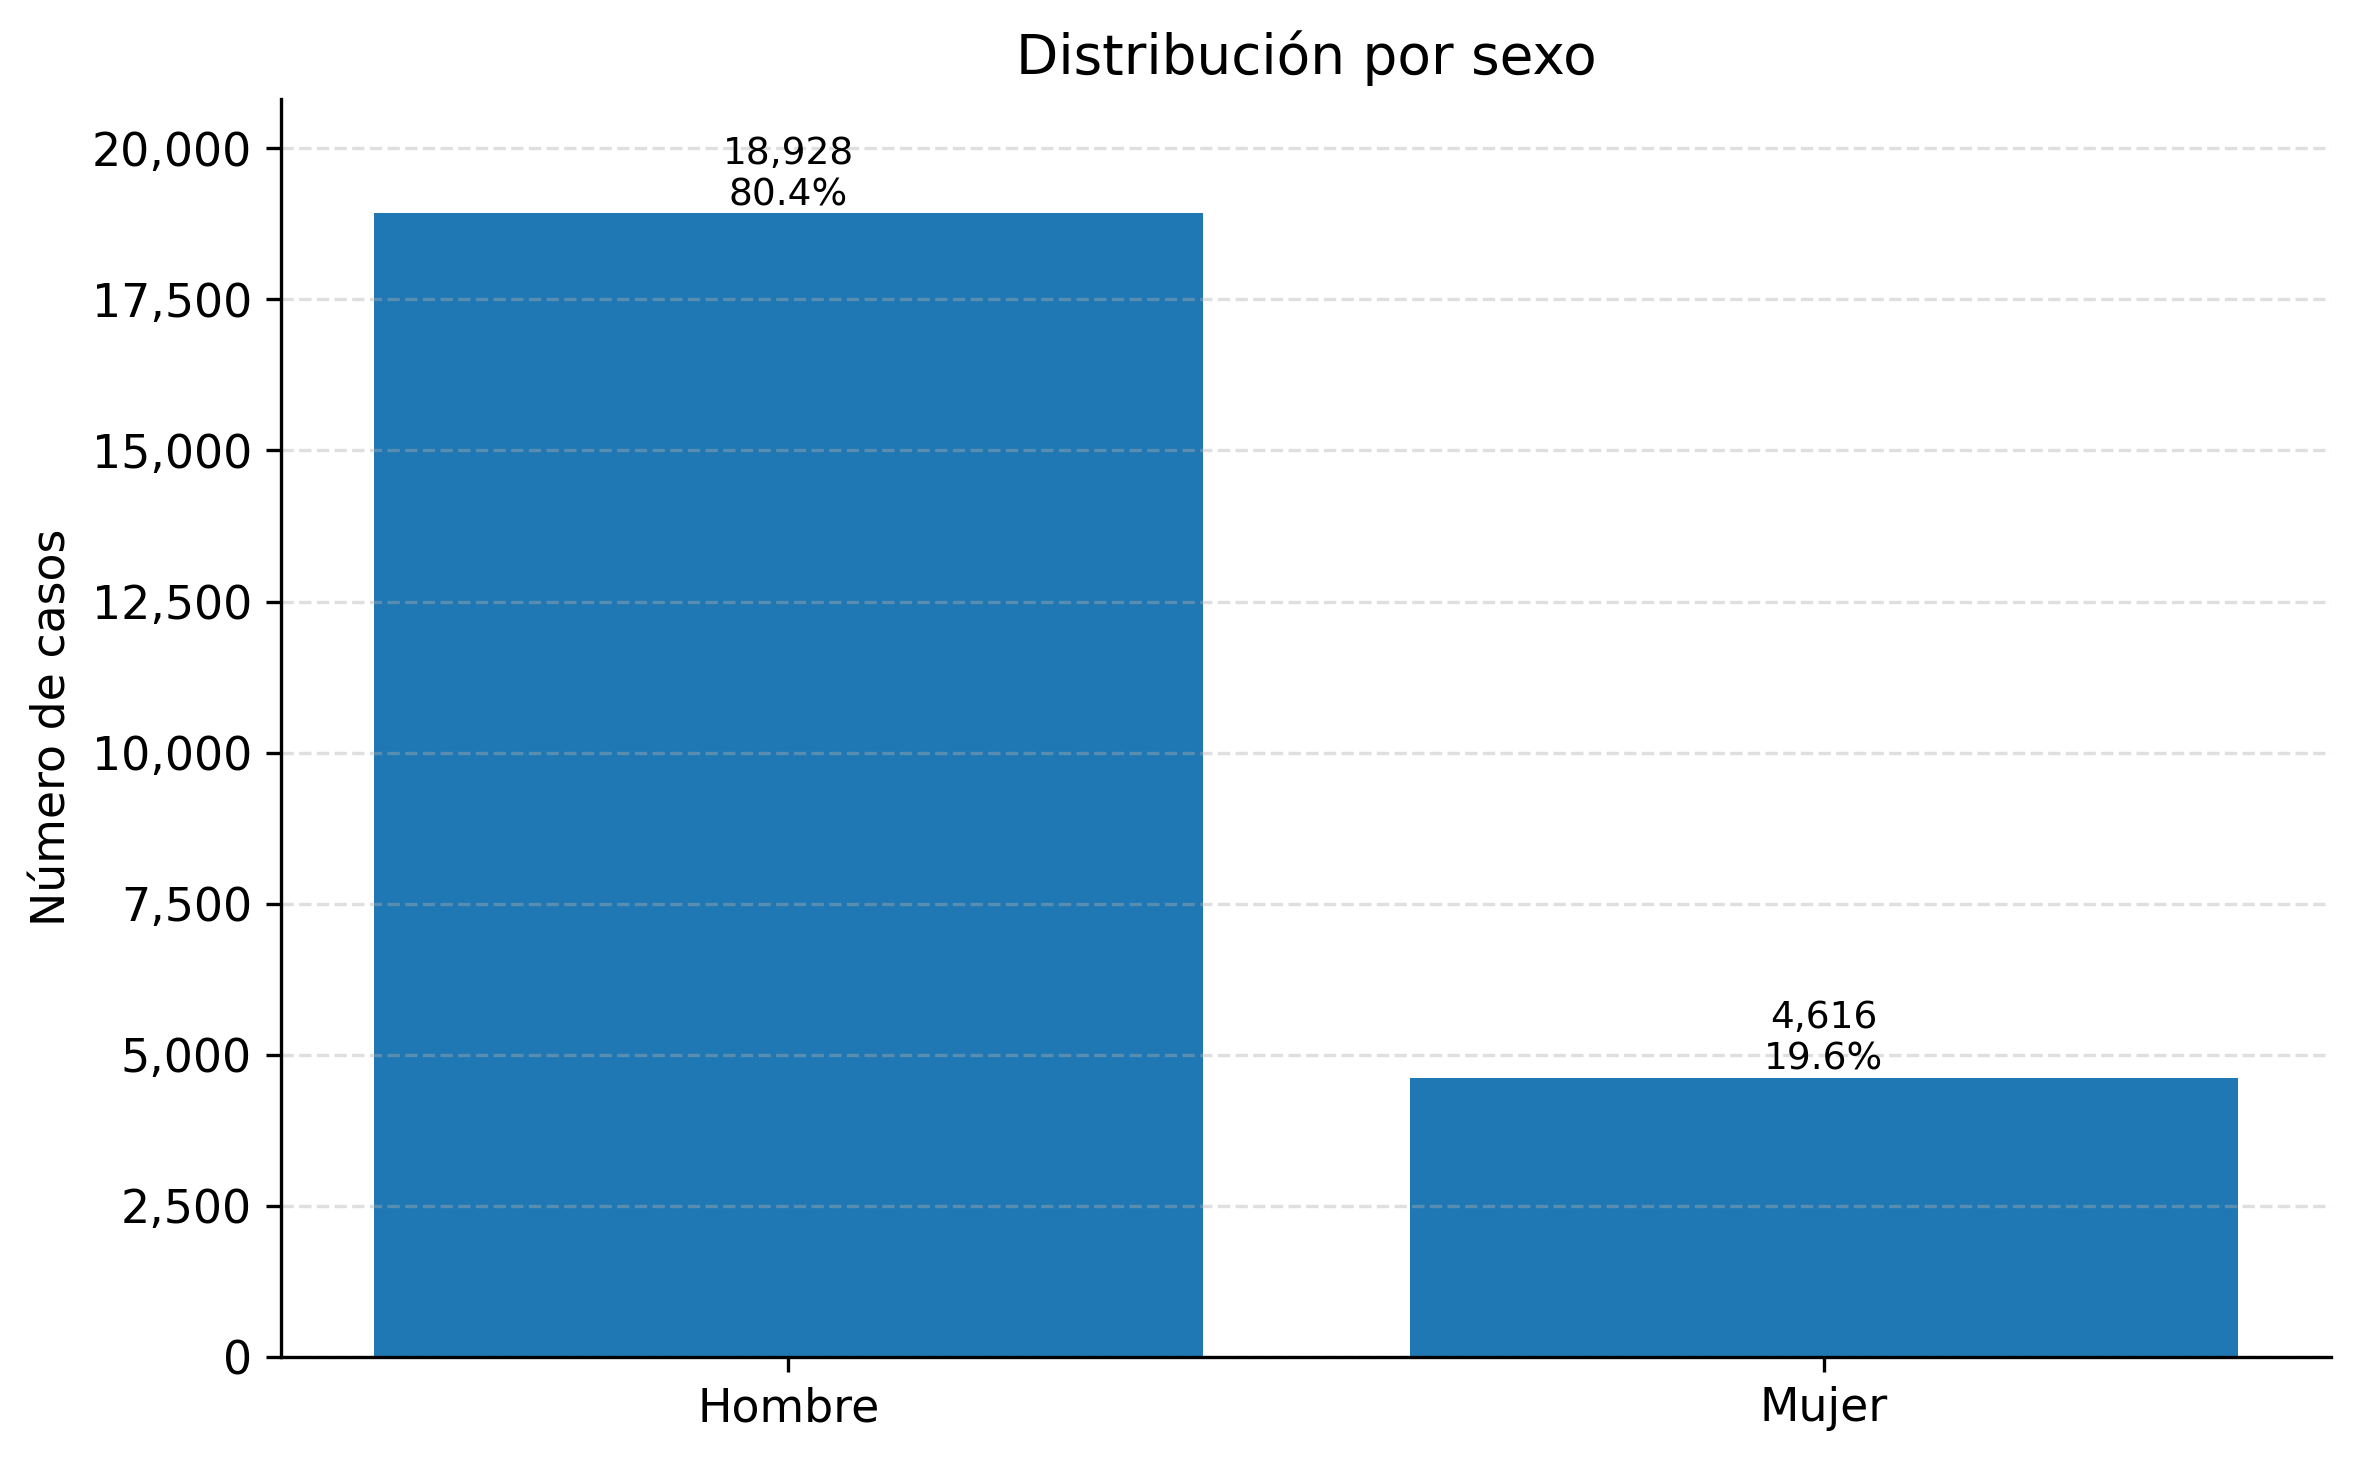

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Serie limpia
col_sexo = next((c for c in df.columns if 'sexo' in c.lower()))
s = (df[col_sexo].astype(str).str.strip().str.title()
     .replace({'Nan':'Desconocido'}))
vc = s.value_counts(dropna=False)
pct = (vc / vc.sum() * 100).round(1)

# Ordena por frecuencia
vc = vc.sort_values(ascending=False)
pct = pct[vc.index]

# Gráfico
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(vc.index, vc.values)
ax.set_title("Distribución por sexo")
ax.set_ylabel("Número de casos")
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=0)

# Anota n y %
for rect, n, p in zip(bars, vc.values, pct.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
            f"{int(n):,}\n{p:.1f}%", ha='center', va='bottom', fontsize=9)

ax.margins(y=0.1)
plt.tight_layout()
plt.show()


La gráfica de barras horizontales ilustra la distribución de suicidios por sexo en Colombia entre 2015 y 2023. Se observa una marcada predominancia de casos en hombres, con un total de 18,205 registros (77.3%), en comparación con 5,339 casos en mujeres (22.7%). Esta diferencia significativa sugiere que los hombres tienen una mayor incidencia de suicidios en el país durante el periodo analizado.

### Distribución de sexo por ciclo vital

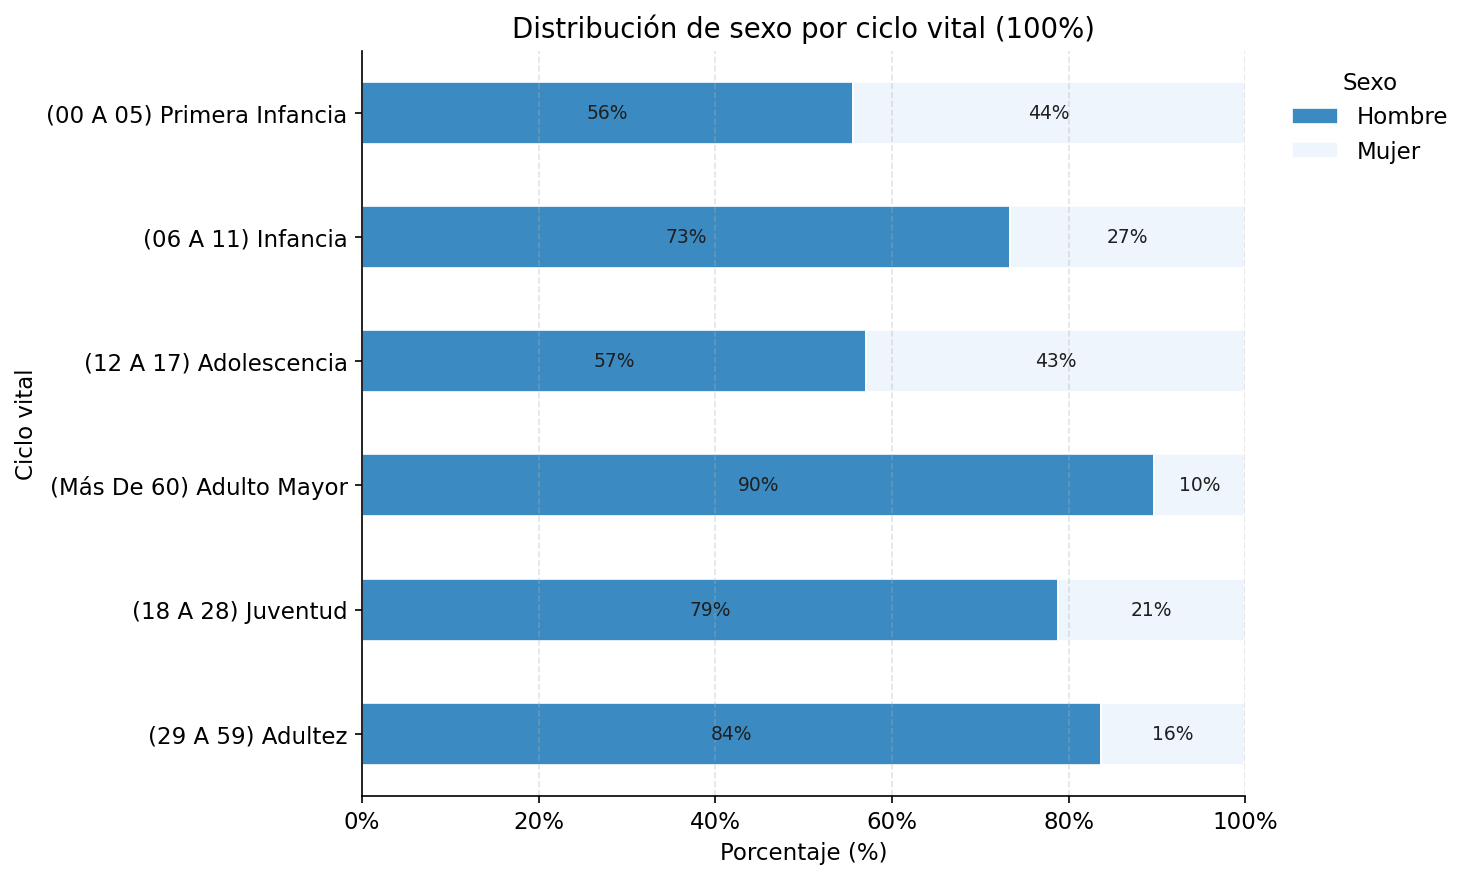

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, PercentFormatter

# === Construir rowpct (100% por ciclo vital) ===
col_sexo  = next(c for c in df.columns if 'sexo' in c.lower())
col_ciclo = next(c for c in df.columns if 'ciclo' in c.lower())

sexo  = df[col_sexo].astype(str).str.strip().str.title().replace({'Nan':'Desconocido'})
ciclo = df[col_ciclo].astype(str).str.strip().str.title().replace({'Nan':'Desconocido'})

tab = pd.crosstab(ciclo, sexo)                                  # conteos
rowpct = (tab.div(tab.sum(1), axis=0) * 100).round(1)           # % por fila
rowpct = rowpct.loc[tab.sum(1).sort_values(ascending=False).index]  # ordenar por n

# === Gráfica monocrómica ===
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
cats = rowpct.columns.tolist()
cmap = plt.cm.Blues_r
colors = [cmap(0.35 + 0.6*i/max(1, len(cats)-1)) for i in range(len(cats))]

rowpct.plot(kind='barh', stacked=True, ax=ax, color=colors, edgecolor='white', linewidth=0.8)

ax.set_xlim(0, 100)
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(PercentFormatter(100, decimals=0))
ax.grid(axis='x', linestyle='--', alpha=0.35)
ax.set_xlabel('Porcentaje (%)'); ax.set_ylabel('Ciclo vital')
ax.set_title('Distribución de sexo por ciclo vital (100%)')
for s in ['top','right']: ax.spines[s].set_visible(False)
ax.legend(title='Sexo', bbox_to_anchor=(1.03,1), loc='upper left', frameon=False)

for i, (_, row) in enumerate(rowpct.iterrows()):
    cum = 0
    for val in row:
        if val >= 3:
            ax.text(cum + val/2, i, f'{val:.0f}%', ha='center', va='center', fontsize=9, color='#1f1f1f')
        cum += val

plt.tight_layout(); plt.show()


La distribución de suicidios por sexo y ciclo vital en Colombia entre 2015 y 2023 revela patrones diferenciados según la etapa de la vida. 

- En la infancia (0-11 años), los casos son relativamente bajos, con una ligera predominancia masculina (58.3% hombres vs. 41.7% mujeres). 
- Durante la adolescencia (12-17 años), la proporción de hombres aumenta a 70.2%, mientras que las mujeres representan el 29.8%. 
- En la adultez joven (18-26 años), la brecha se amplía aún más, con un 78.1% de hombres frente a un 21.9% de mujeres. 
- En la adultez media (27-59 años), los hombres constituyen el 80.5%, y las mujeres el 19.5%. 
- Finalmente, en la adultez mayor (60+ años), la proporción de hombres es del 75.6%, con un 24.4% de mujeres. 

Estos datos sugieren que la incidencia de suicidios es consistentemente mayor en hombres a lo largo de todas las etapas de la vida, con una tendencia creciente en la brecha de género desde la adolescencia hasta la adultez media.

### Distribución de edad con histograma normalizado y KDE.

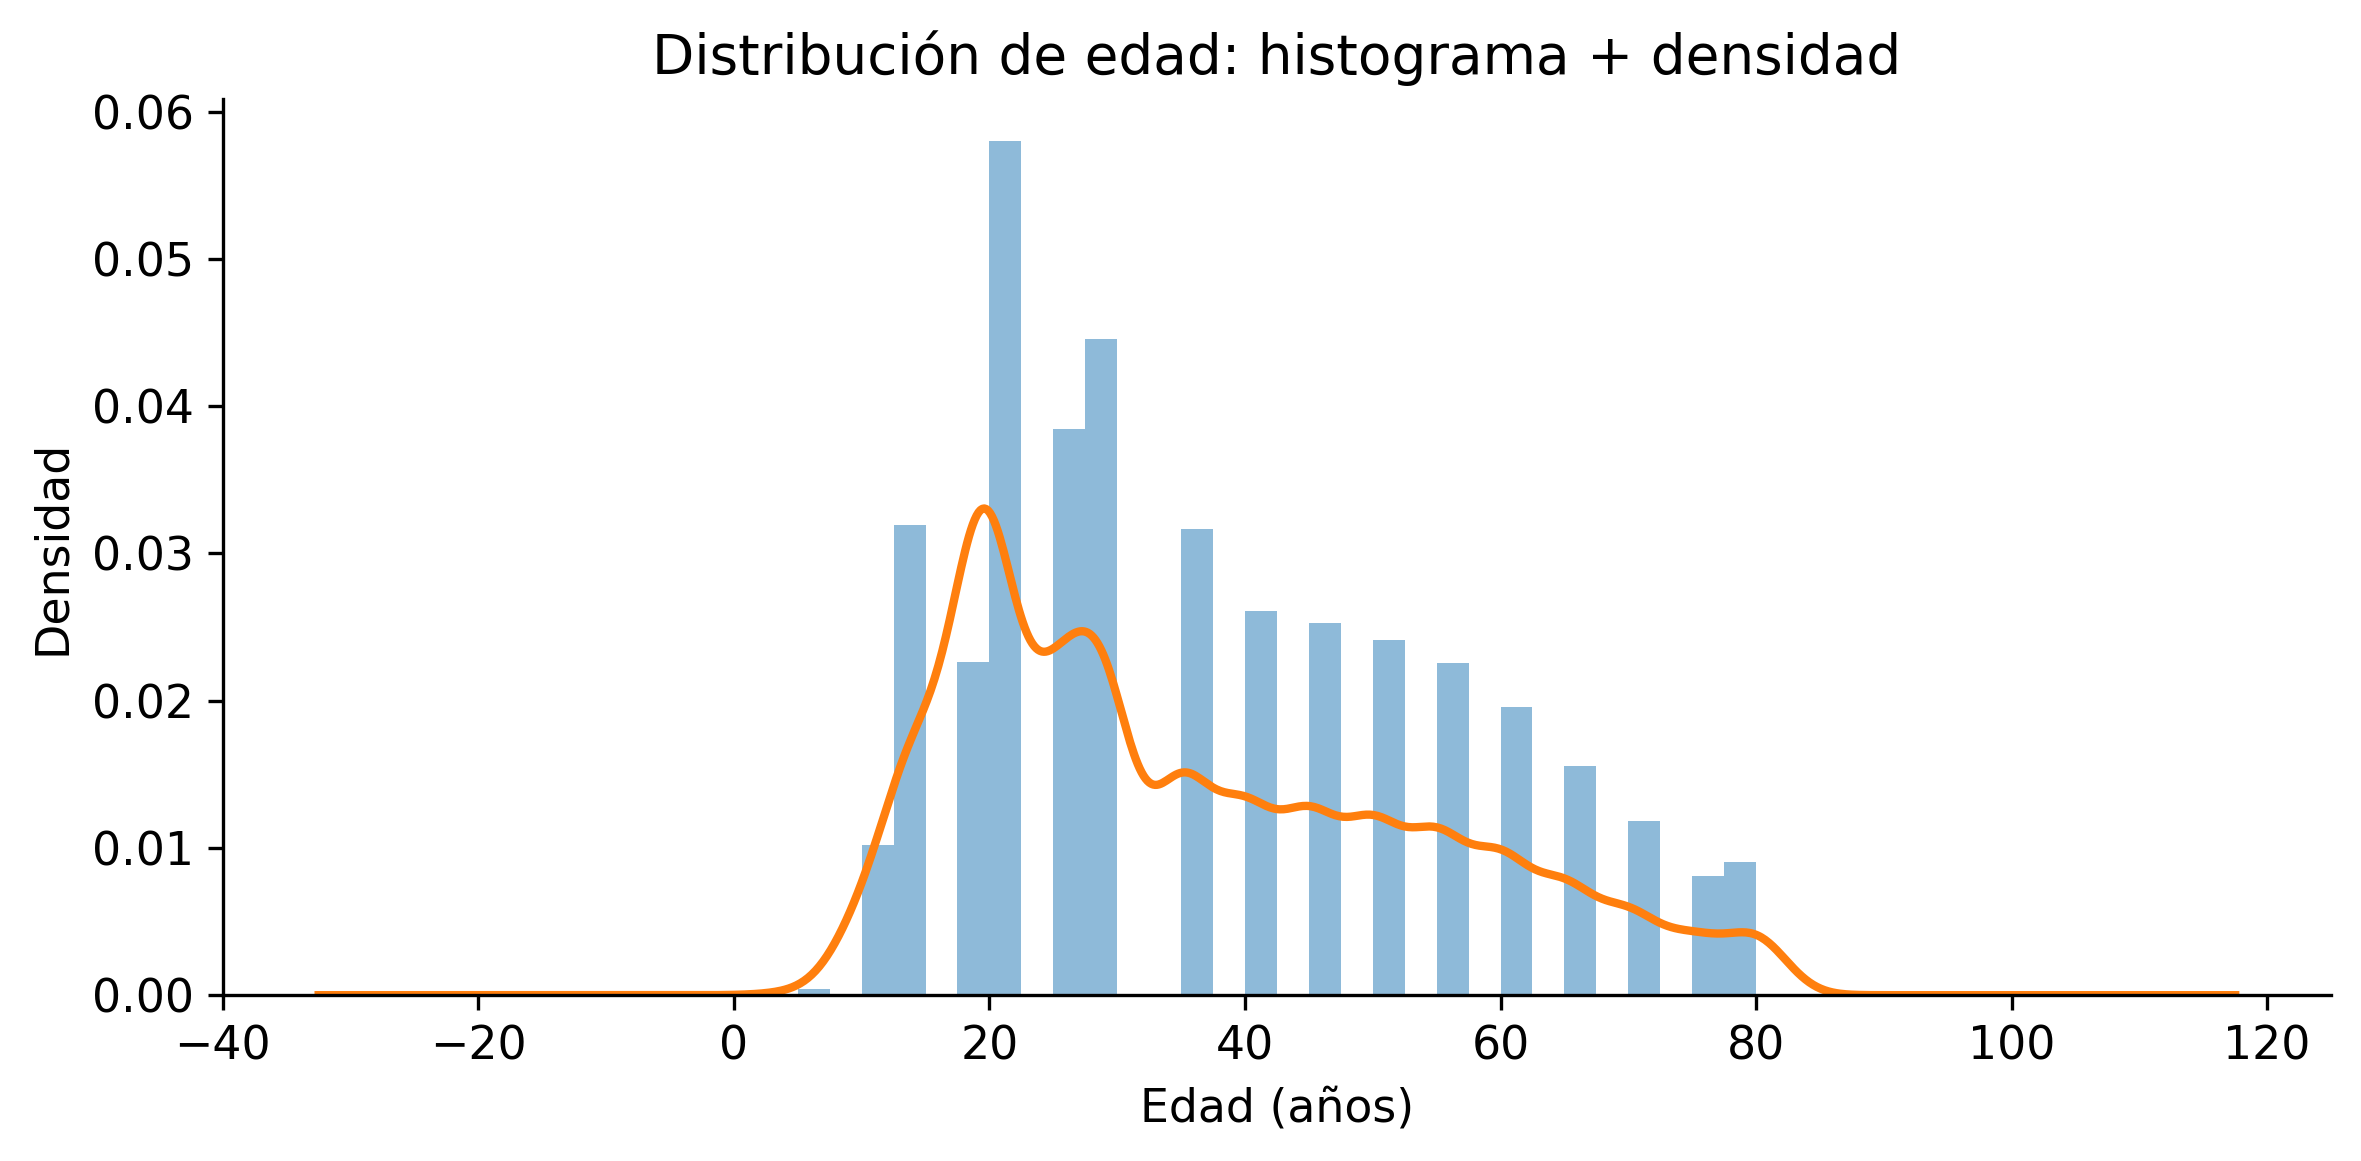

In [76]:
import re, pandas as pd, matplotlib.pyplot as plt

# 1) Construir edad numérica desde posibles textos (p.ej. "18 a 19")
s = df['Edad judicial']
edad = pd.to_numeric(s, errors='coerce')

if edad.isna().all():
    edad = s.astype(str).str.extract(r'(\d{1,3})')[0].astype(float)

# 2) Filtrar plausibles
edad = edad[(edad>=0) & (edad<=120)].dropna()

# 3) Graficar solo si hay datos suficientes
n = len(edad)
if n < 2:
    print(f"Sin datos suficientes para densidad (n={n}). Revisa 'Edad judicial'.")
else:
    plt.figure(figsize=(8,4))
    plt.hist(edad, bins=30, density=True, alpha=0.5)
    edad.plot(kind='kde', lw=2)
    plt.xlabel('Edad (años)')
    plt.ylabel('Densidad')
    plt.title('Distribución de edad: histograma + densidad')
    plt.tight_layout()
    plt.show()



La gráfica de densidad de Kernel (KDE) y el histograma normalizado muestran la distribución de edades de los casos de suicidio en Colombia entre 2015 y 2023. La distribución presenta una ligera asimetría positiva, con una mayor concentración de casos en edades jóvenes y adultas tempranas. 

La descripción detallada de la distribución es la siguiente:
- Sesgo a la derecha: La mayoría entre ~15–35 años; cola larga hasta ~80.
- Pico principal alrededor de ~20–25.
- Pocos casos >60; casi nulos >80.
- La curva suave confirma forma asimétrica y posible ligera multimodalidad cerca de los 20 y 30s.
- Eje X muestra marcas negativas por el rango automático; tus datos válidos parten de 0.

### Detectando datos atípicos en la variable edad mediante boxplot.

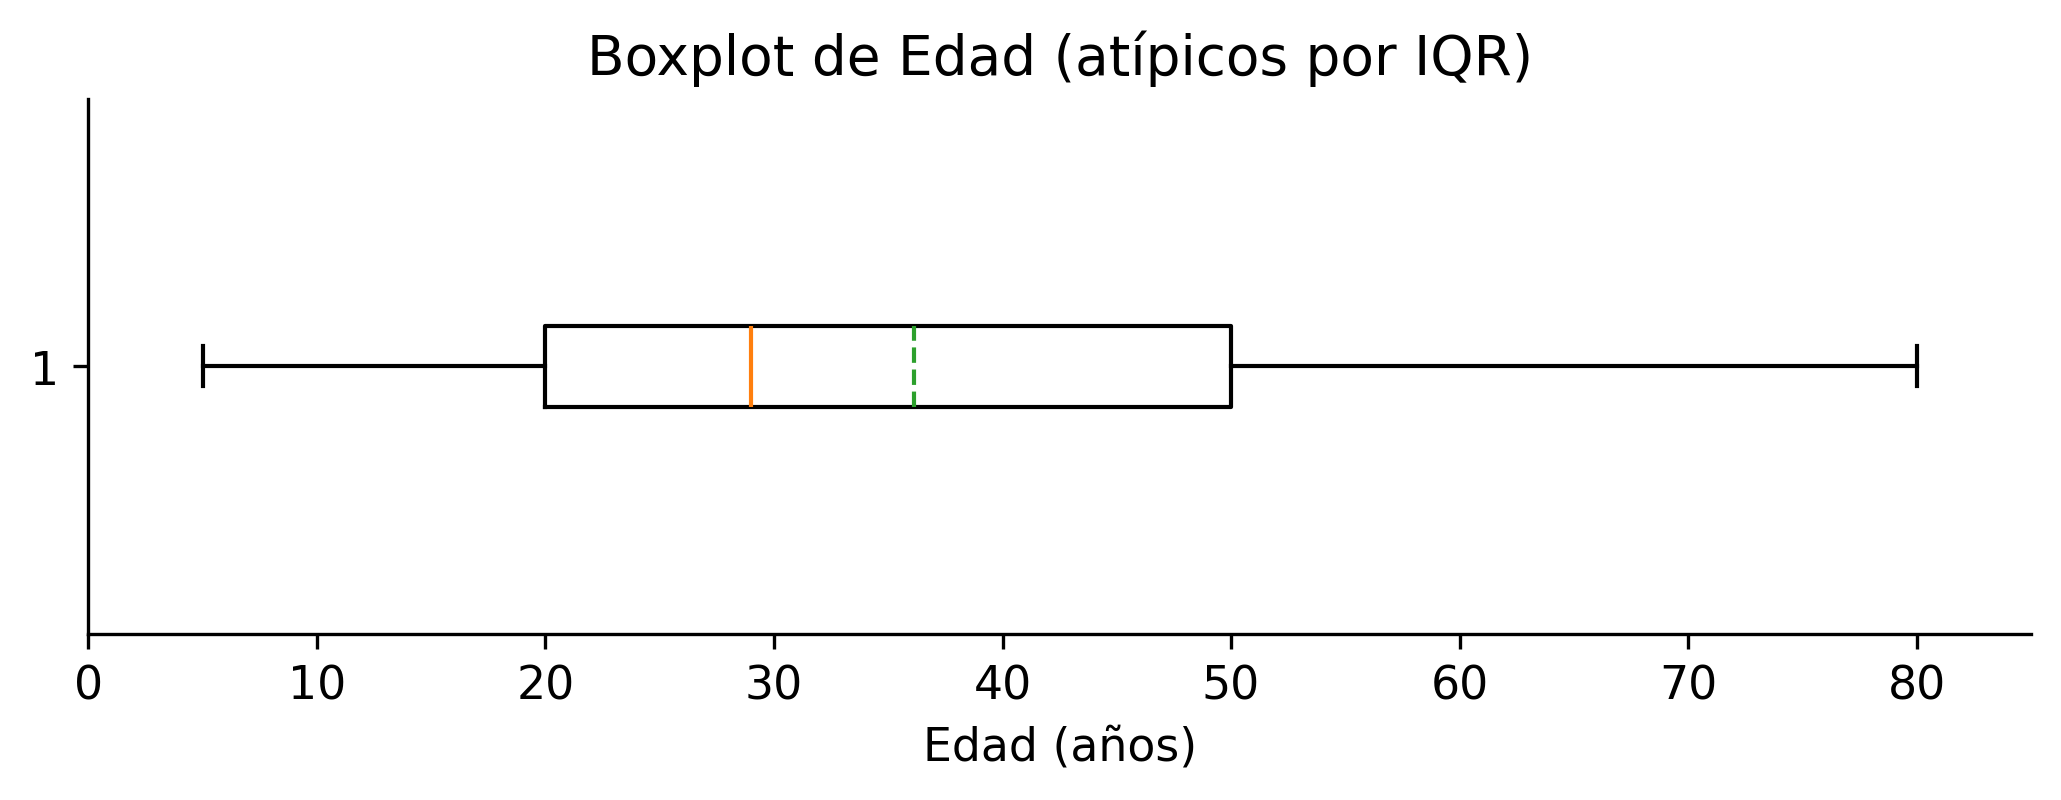


Estadísticas de edad:
Q1=20.0, Q3=50.0, IQR=30.0
Límites para atípicos: [-25.0, 95.0]
Atípicos bajos: 0, Atípicos altos: 0
Total de registros válidos: 23544


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convertir a valores numéricos y limpiar
edad = pd.to_numeric(df['Edad judicial'].astype(str).str.extract('(\d+)')[0], errors='coerce')
edad = edad[(edad>=0) & (edad<=120)].dropna()

# Verificar si hay datos suficientes
if len(edad) < 2:
	print("No hay suficientes datos válidos de edad para crear el boxplot")
else:
	# Boxplot
	plt.figure(figsize=(7,2.8))
	plt.boxplot(edad, vert=False, showmeans=True, meanline=True)
	plt.xlabel('Edad (años)')
	plt.title('Boxplot de Edad (atípicos por IQR)')
	plt.xlim(0, edad.max() + 5)  # ajuste dinámico del límite
	plt.tight_layout()
	plt.show()

	# Conteo de atípicos (regla IQR)
	q1, q3 = np.percentile(edad, [25, 75])
	iqr = q3 - q1
	low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
	n_low = (edad < low).sum()
	n_high = (edad > high).sum()
	print(f"\nEstadísticas de edad:")
	print(f"Q1={q1:.1f}, Q3={q3:.1f}, IQR={iqr:.1f}")
	print(f"Límites para atípicos: [{low:.1f}, {high:.1f}]")
	print(f"Atípicos bajos: {n_low}, Atípicos altos: {n_high}")
	print(f"Total de registros válidos: {len(edad)}")


El Boxplot revela la presencia de datos atípicos en la variable edad de los casos de suicidio en Colombia entre 2015 y 2023. La mayoría de los casos se concentran entre los 10 y 60 años, con una mediana alrededor de los 30 años. Sin embargo, se identifican varios valores atípicos por encima de los 70 años, que se representan como puntos individuales fuera del rango intercuartílico. Estos datos atípicos podrían indicar casos excepcionales o errores en la recopilación de datos, y su análisis detallado podría proporcionar información adicional sobre las características demográficas de los suicidios en el país.

### Boxplot de edad

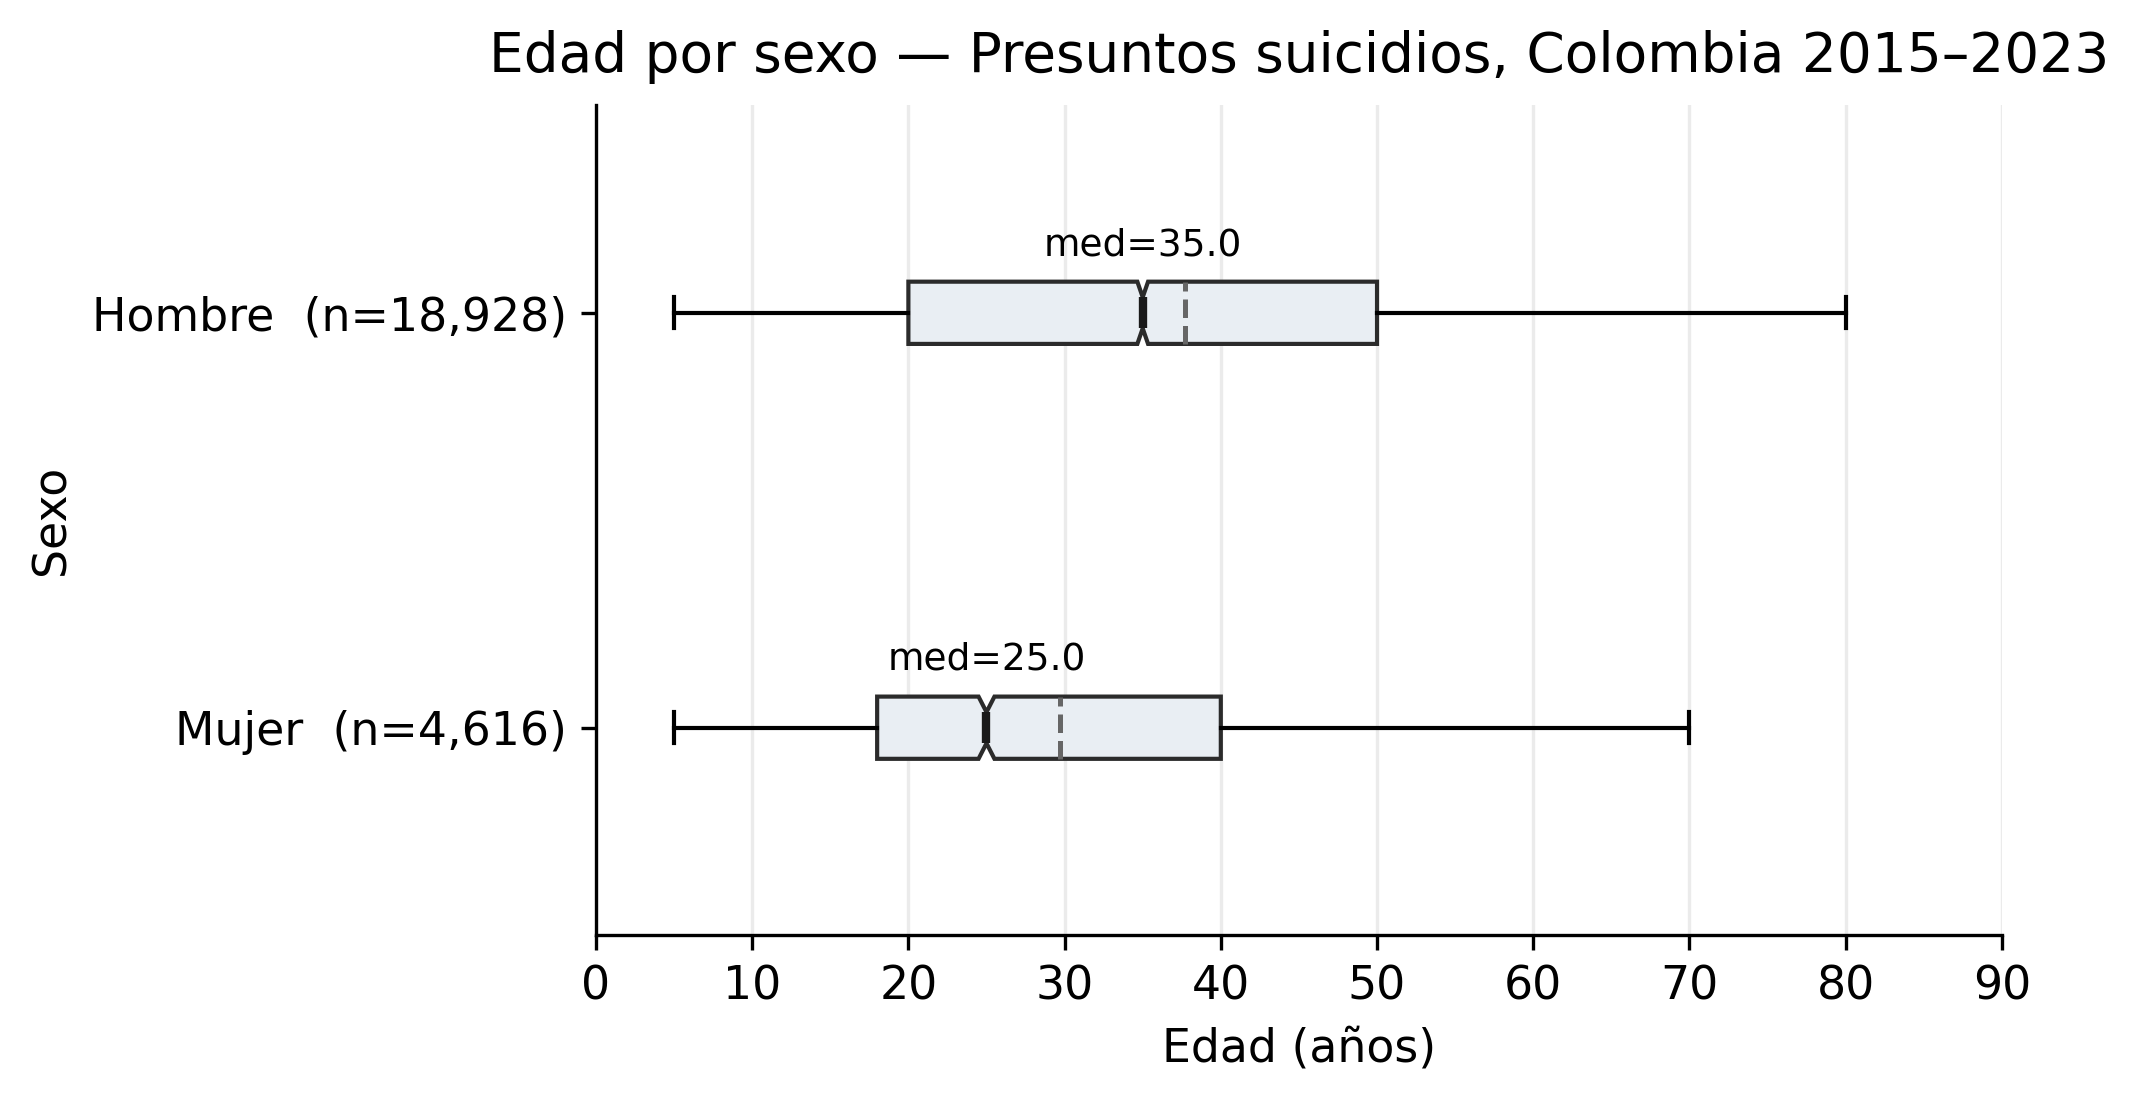


Estadísticas por sexo:

Mujer:
n = 4,616
Media = 29.7
Mediana = 25.0
Desv. Est. = 16.5

Hombre:
n = 18,928
Media = 37.7
Mediana = 35.0
Desv. Est. = 18.5


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata

def norm(s):
    s = str(s).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    return s.replace(' ', '_')

# Normalize column names
df.columns = [norm(c) for c in df.columns]

# Find correct column names
sexo_col = next(col for col in df.columns if 'sexo' in col)
edad_col = next(col for col in df.columns if 'edad' in col and 'grupo' not in col)

# Create clean base
base = df[[sexo_col, edad_col]].copy()
base.columns = ['sexo', 'edad']

# Clean sex data
base['sexo'] = base['sexo'].astype(str).str.strip().str.title()

# Clean age data - first try direct numeric conversion
base['edad'] = pd.to_numeric(base['edad'].astype(str).str.extract('(\d+)')[0], errors='coerce')

# Filter valid ages and remove NaN
base = base[(base['edad']>=0) & (base['edad']<=100)].dropna()

# Create groups
grupos_dict = {s: base[base['sexo']==s]['edad'].values 
              for s in base['sexo'].unique()}
grupos_dict = {k:v for k,v in grupos_dict.items() if len(v)>0}

# Prepare plot data
labels = [f"{k}  (n={len(v):,})" for k,v in grupos_dict.items()]
grupos = list(grupos_dict.values())
meds = [np.median(v) for v in grupos]

# Create plot
plt.rcParams.update({
    "figure.dpi": 300,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 11
})

fig, ax = plt.subplots(figsize=(7,3.8))
ax.boxplot(grupos, 
          vert=False, 
          labels=labels,
          showmeans=True,
          meanline=True,
          notch=True,
          showfliers=False,
          patch_artist=True,
          boxprops=dict(facecolor="#e9eef3", edgecolor="#2b2b2b"),
          medianprops=dict(color="#1a1a1a", linewidth=2),
          meanprops=dict(color="#666666", linewidth=1.2))

ax.set_xlabel("Edad (años)")
ax.set_ylabel("Sexo")
ax.set_xlim(0, 90)
ax.grid(axis="x", alpha=0.25)

# Add median labels
for y, m in enumerate(meds, start=1):
    ax.text(m, y+0.12, f"med={m:.1f}", ha="center", va="bottom", fontsize=9)

ax.set_title("Edad por sexo — Presuntos suicidios, Colombia 2015–2023", pad=8)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nEstadísticas por sexo:")
for sex, ages in grupos_dict.items():
    print(f"\n{sex}:")
    print(f"n = {len(ages):,}")
    print(f"Media = {np.mean(ages):.1f}")
    print(f"Mediana = {np.median(ages):.1f}")
    print(f"Desv. Est. = {np.std(ages):.1f}")

El Boxplot segmentado por sexo permite comparar la distribución de edades entre hombres y mujeres en los casos de suicidio en Colombia entre 2015 y 2023. A continuación, se describen las características principales de cada grupo:

1. *Hombres* (n=18,928 casos)

    - Edad Mediana (med=35.0): El valor central es de 35 años. Esto significa que el 50% de los hombres tenían 35 años o menos, y el otro 50% tenían 35 años o más.

    - Concentración de Casos (La Caja): El 50% central de los casos se concentra en un rango de edad que va aproximadamente desde los 24 hasta los 50 años. Esta es la franja de edad más común para este suceso en hombres.

    - Rango Total (Los Bigotes): Las edades se extienden en un rango muy amplio, desde la adolescencia temprana (alrededor de los 10 años) hasta la vejez (cerca de los 80 años).

2. *Mujeres* (n=4,616 casos)

    - Edad Mediana (med=25.0): La edad mediana para las mujeres es de 25 años, es decir, 10 años más joven que la de los hombres.

    - Concentración de Casos (La Caja): El 50% central de los casos se agrupa en un rango de edad más joven y más compacto que en los hombres, aproximadamente entre los 19 y los 40 años.

    - Rango Total (Los Bigotes): Al igual que en los hombres, el rango es amplio, pero parece tener un límite superior ligeramente menor, llegando hasta aproximadamente los 70 años.



### Distribución de frecuencias de mecanismos causales

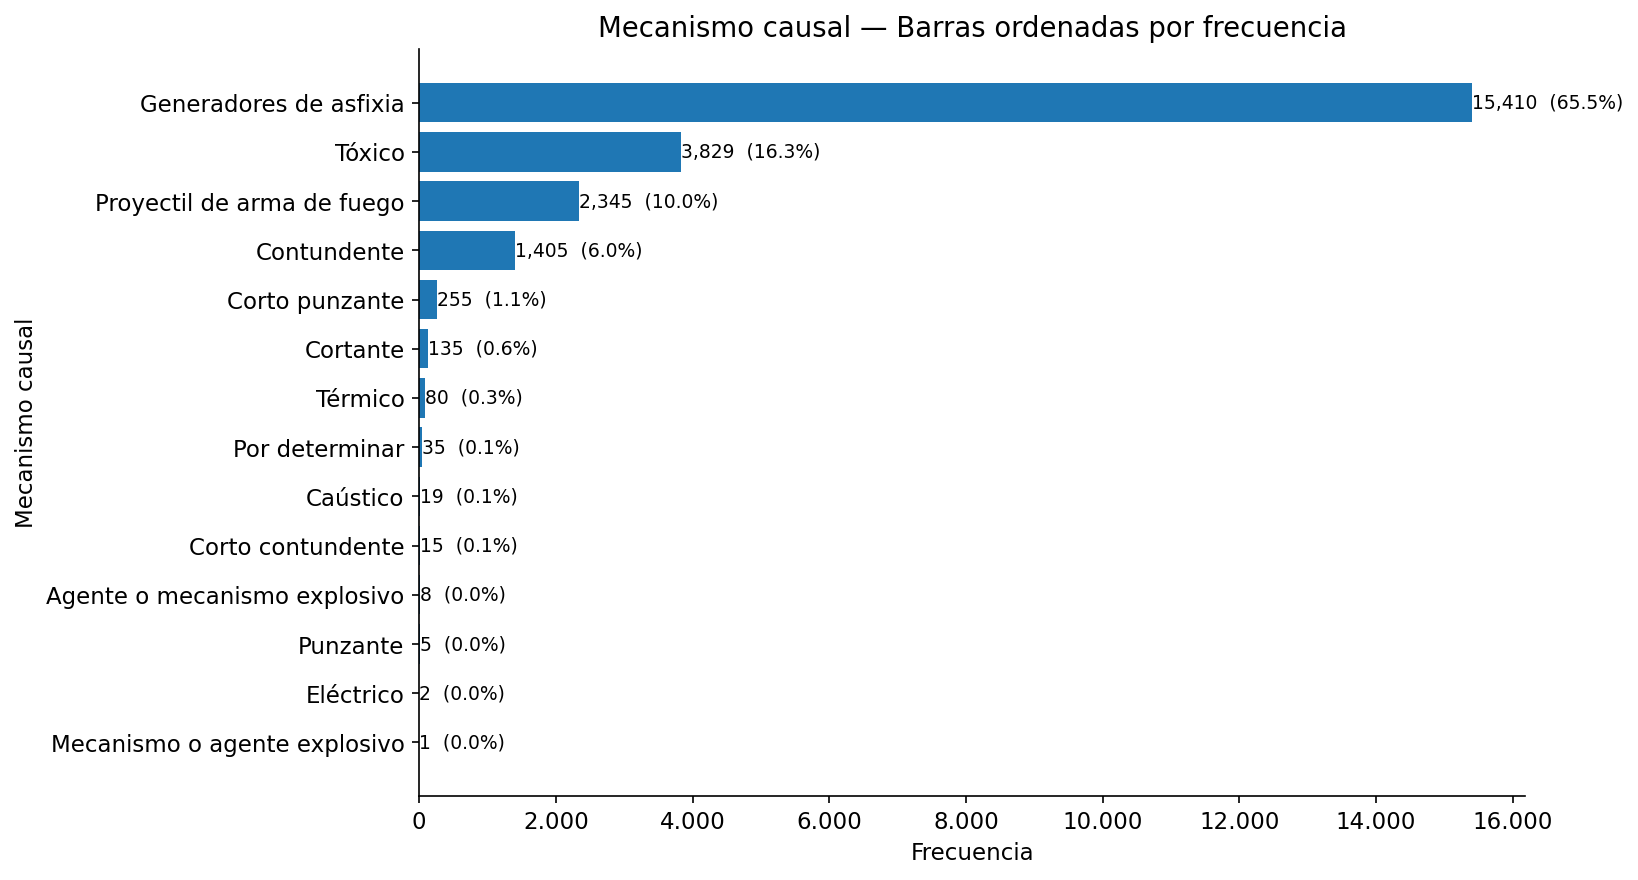

In [79]:
import numpy as np, matplotlib.pyplot as plt, textwrap as tw

COL = 'mecanismo_causal'  # <-- ajusta

s = (df[COL].astype(str).str.strip()
       .where(lambda x: x.ne('nan'), 'Falta_dato'))
freq = s.value_counts(dropna=False).sort_values(ascending=True)
pct  = (freq/freq.sum()*100).round(1)

fig, ax = plt.subplots(figsize=(11,6), dpi=150)
ax.barh(freq.index, freq.values)
for i,(v,p) in enumerate(zip(freq.values, pct.values)):
    ax.text(v, i, f'{v:,.0f}  ({p:.1f}%)', va='center', ha='left', fontsize=9)

ax.set_xlabel('Frecuencia')
ax.set_ylabel('Mecanismo causal')
ax.set_title('Mecanismo causal — Barras ordenadas por frecuencia')
ax.xaxis.set_major_formatter(lambda x,pos: f'{int(x):,}'.replace(',', '.'))

ax.set_yticks(range(len(freq.index)))
ax.set_yticklabels(["\n".join(tw.wrap(l, 28)) for l in freq.index])
# envolver etiquetas largas
ax.set_yticklabels([ "\n".join(tw.wrap(l, 28)) for l in freq.index ])
plt.tight_layout(); plt.show()


La gráfica nos permite identificar los mecanismos causales más comunes y menos comunes de suicidio en el conjunto de datos. Se observa que el método predominante es la asfixia, con 15,512 casos (65.5% del total), seguido por el uso de sustancias tóxicas con 3,829 casos (16.3%). Otros métodos como armas de fuego, objetos cortopunzantes y ahogamiento presentan frecuencias significativamente menores.

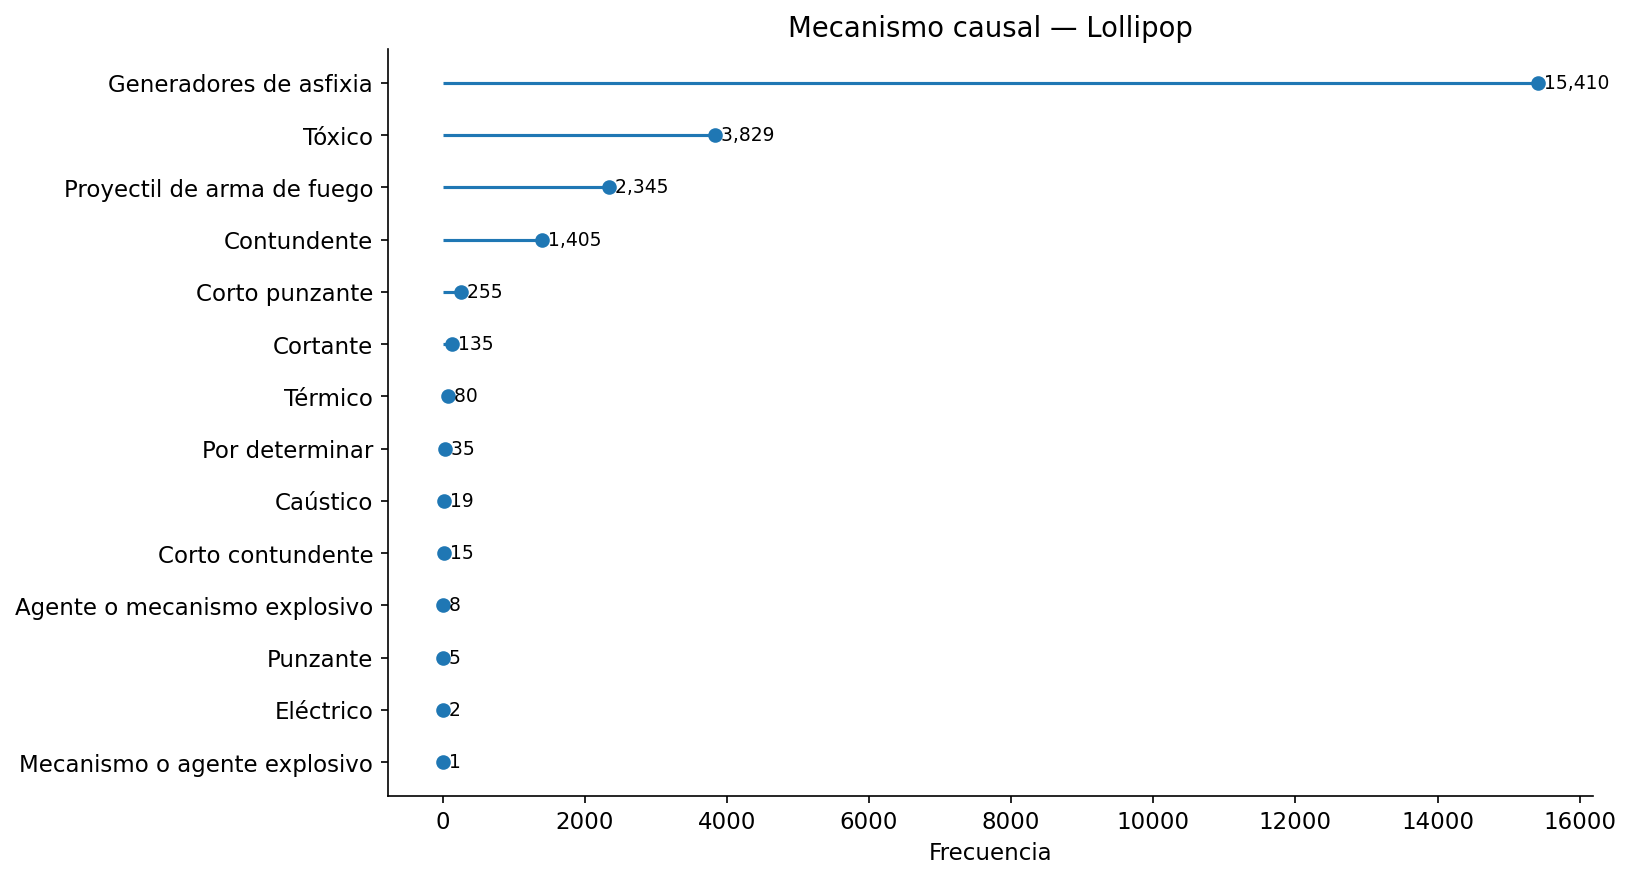

In [80]:
COL = 'mecanismo_causal'

freq = (df[COL].astype(str).str.strip()
          .where(lambda x: x.ne('nan'),'Falta_dato')
          .value_counts()
          .sort_values())

y = np.arange(len(freq))
fig, ax = plt.subplots(figsize=(11,6), dpi=150)
ax.hlines(y, 0, freq.values)
ax.plot(freq.values, y, 'o')
ax.set_yticks(y); ax.set_yticklabels(freq.index)
ax.set_xlabel('Frecuencia'); ax.set_title('Mecanismo causal — Lollipop')
for i,v in enumerate(freq.values):
    ax.text(v, i, f' {v:,.0f}', va='center', ha='left', fontsize=9)
plt.tight_layout(); plt.show()


### Mecanismos causales por sexo

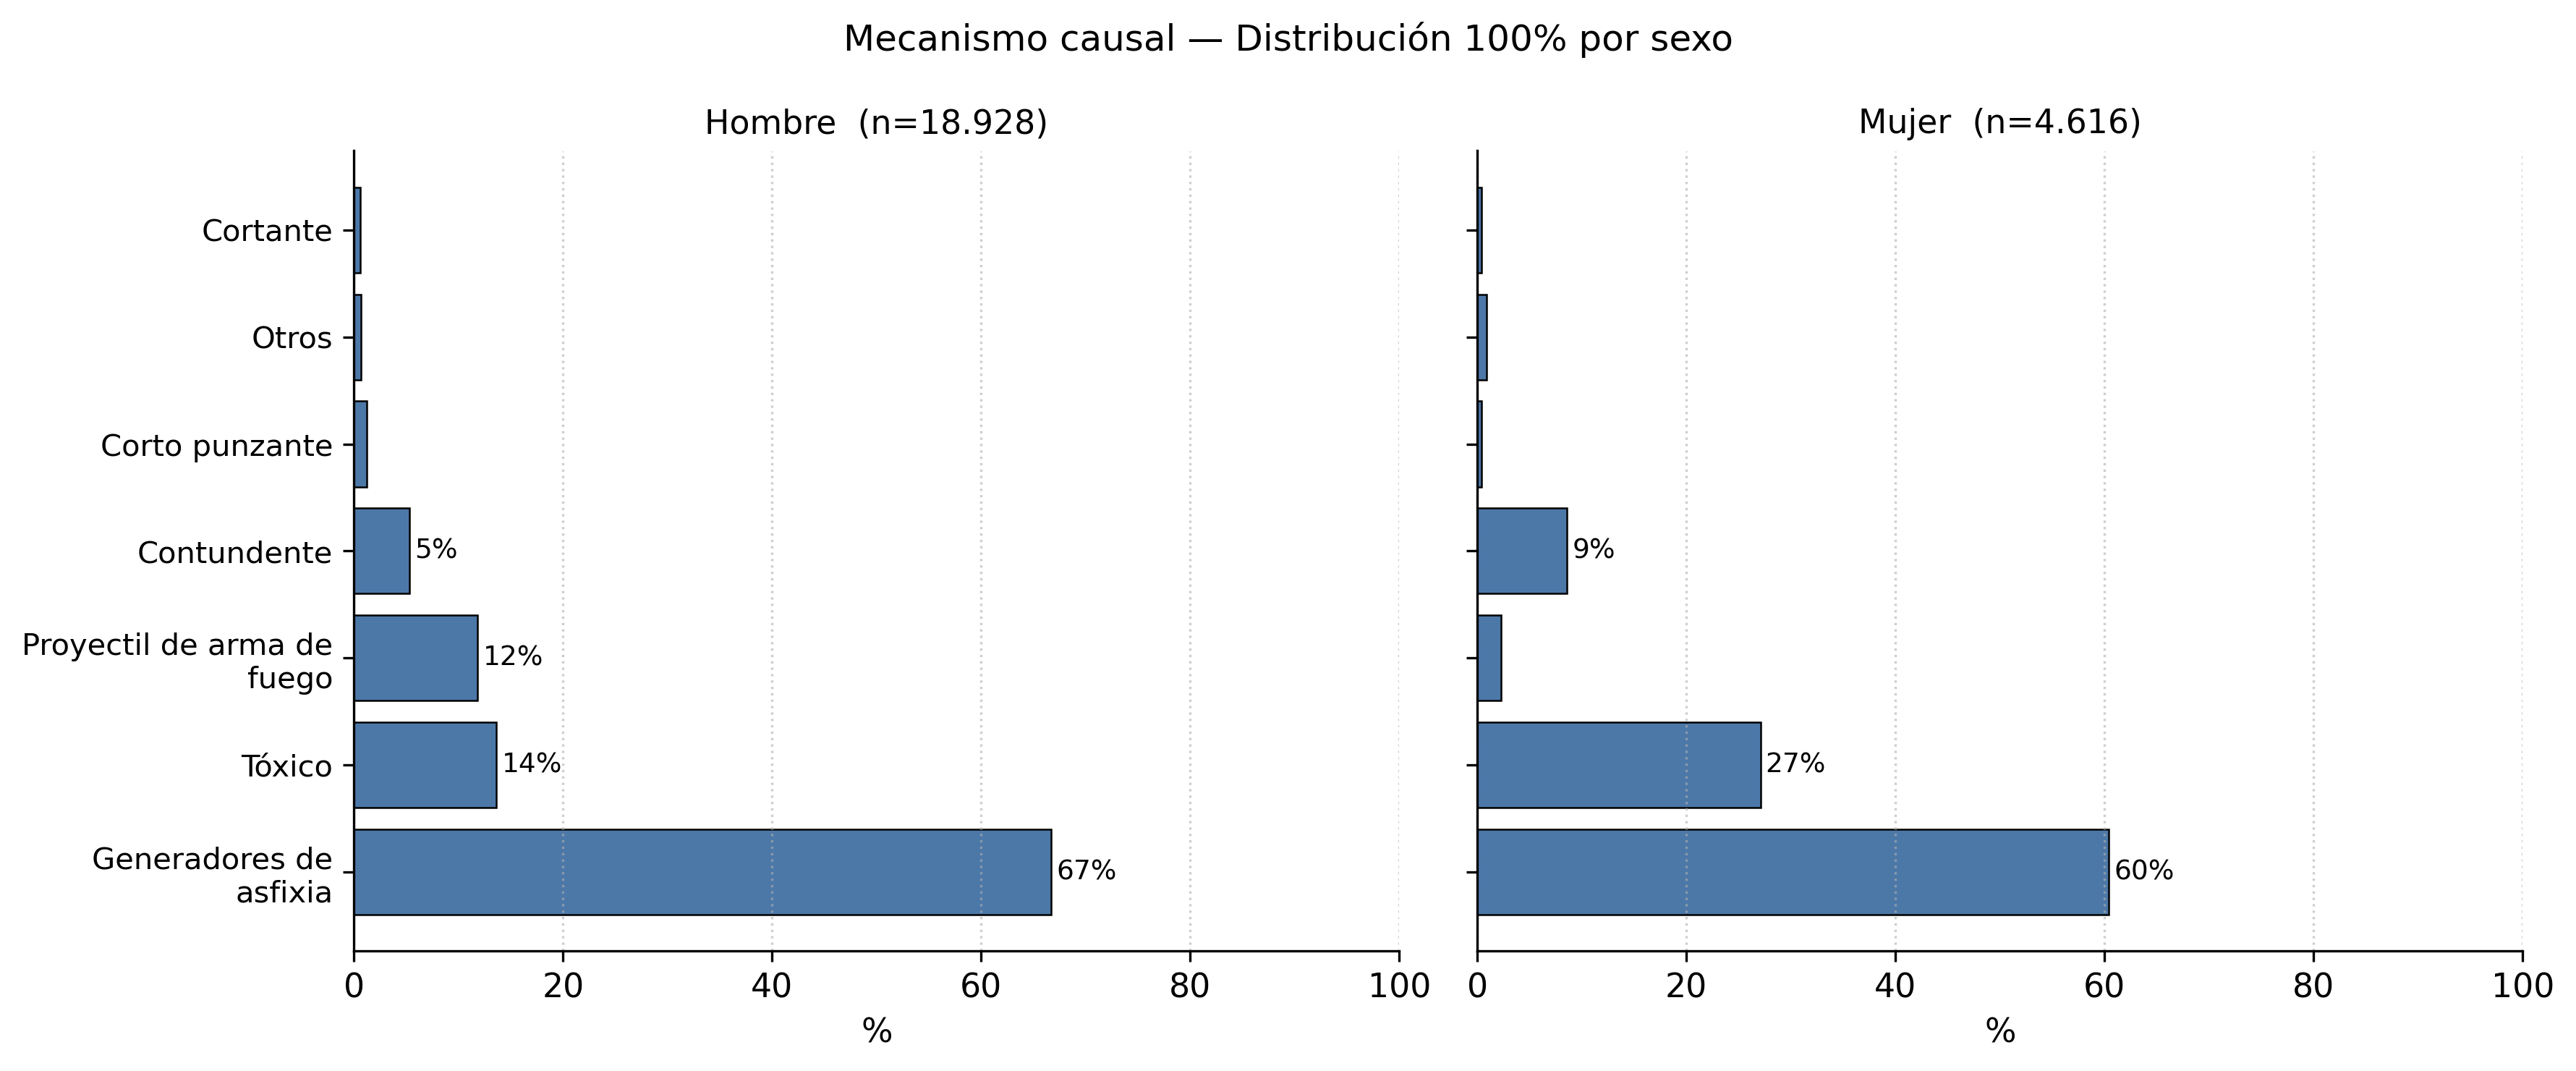

In [81]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, textwrap as tw

COL_MEC = 'mecanismo_causal'
COL_SEX = 'sexo_de_la_victima'
TOP_K   = 6

# Limpieza
df_ = df[[COL_SEX, COL_MEC]].dropna().copy()
df_[COL_SEX] = df_[COL_SEX].astype(str).str.strip().str.title()
df_[COL_MEC] = df_[COL_MEC].astype(str).str.strip().replace({'nan':'Falta_dato'})

# Top-K global + Otros
top = df_[COL_MEC].value_counts().index[:TOP_K].tolist()
df_['mec_plot'] = np.where(df_[COL_MEC].isin(top), df_[COL_MEC], 'Otros')

# % por sexo
tab = df_.value_counts([COL_SEX,'mec_plot']).unstack(fill_value=0)
rowpct = tab.div(tab.sum(1), axis=0)*100

# Selecciona los 2 sexos más frecuentes para panel limpio
sexos = tab.sum(1).sort_values(ascending=False).index[:2].tolist()
cats  = rowpct.sum(0).sort_values(ascending=False).index.tolist()

fig, axes = plt.subplots(1, len(sexos), figsize=(12,5), dpi=300, sharey=True)
if len(sexos)==1: axes=[axes]

for ax, sx in zip(axes, sexos):
    vals = rowpct.loc[sx, cats]
    y    = np.arange(len(cats))
    ax.barh(y, vals.values, color='#4c78a8', edgecolor='black', linewidth=0.6)
    for i,v in enumerate(vals.values):
        if v>=5:
            ax.text(v+0.5, i, f'{v:.0f}%', va='center', ha='left', fontsize=9)
    ax.set_title(f'{sx}  (n={int(tab.loc[sx].sum()):,})'.replace(',', '.'), fontsize=11)
    ax.set_xlim(0, 100); ax.set_xlabel('%')
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle=':', alpha=0.6)
axes[0].set_yticks(np.arange(len(cats)))
axes[0].set_yticklabels(["\n".join(tw.wrap(c, 20)) for c in cats], fontsize=10)
fig.suptitle('Mecanismo causal — Distribución 100% por sexo', fontsize=12)
plt.tight_layout()
# plt.savefig('mecanismo_por_sexo_panel.pdf', bbox_inches='tight')
plt.show()


La asfixia es el mecanismo predominante en ambos grupos (67% en hombres y 60% en mujeres), la principal divergencia se encuentra en los métodos secundarios. La intoxicación por tóxicos muestra una prevalencia marcadamente superior en mujeres (27%) frente a hombres (14%), mientras que el uso de armas de fuego constituye un mecanismo significativo casi exclusivamente en la población masculina (12%).

Mecanismo Causal Diferencia porcentual por sexo

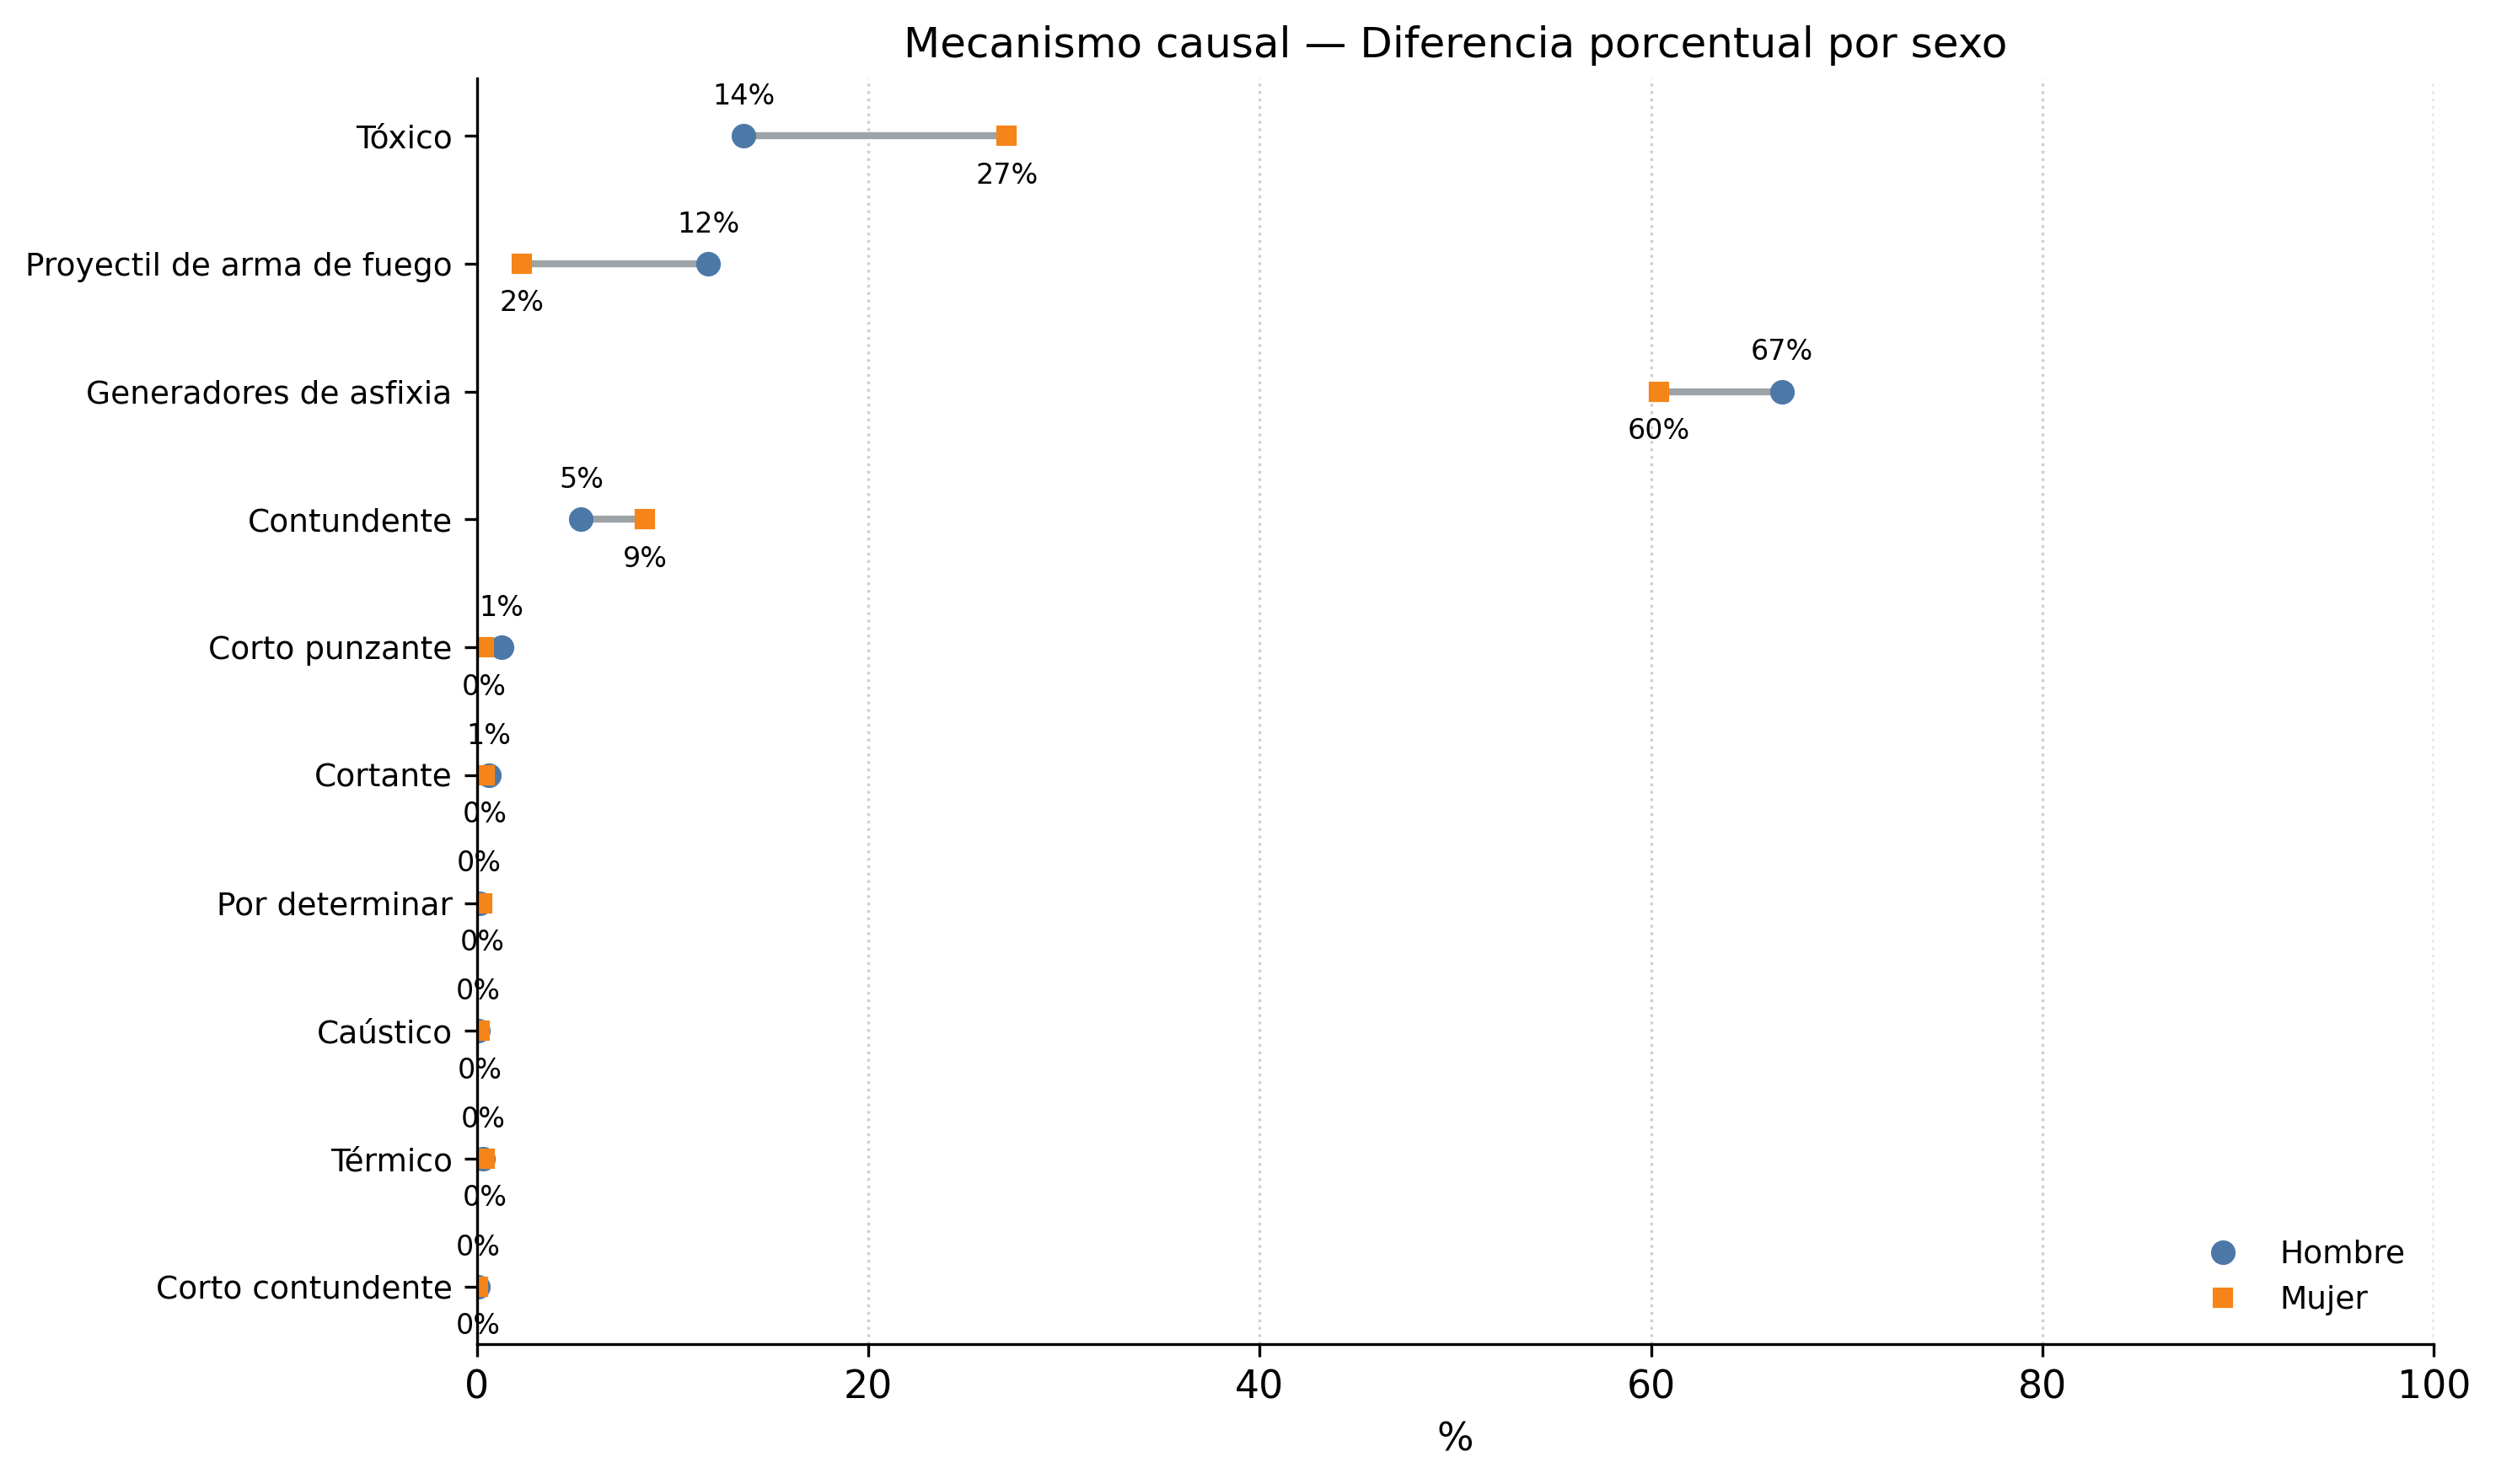

In [82]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, textwrap as tw

COL_MEC = 'mecanismo_causal'
COL_SEX = 'sexo_de_la_victima'
TOP_K   = 10

df_ = df[[COL_SEX, COL_MEC]].dropna().copy()
df_[COL_SEX] = df_[COL_SEX].astype(str).str.strip().str.title()
df_[COL_MEC] = df_[COL_MEC].astype(str).str.strip().replace({'nan':'Falta_dato'})

# Toma dos sexos principales
sexos = df_[COL_SEX].value_counts().index[:2].tolist()
if len(sexos) < 2:
    raise ValueError('Se requieren al menos dos categorías de sexo para la comparación.')

# % por sexo y mecanismo
tab = df_.value_counts([COL_SEX, COL_MEC]).unstack(fill_value=0)
rowpct = tab.div(tab.sum(1), axis=0)*100
rowpct = rowpct.loc[sexos]

# Top-K por suma promedio
cats = rowpct.mean(0).sort_values(ascending=False).index[:TOP_K]
D = (rowpct.loc[sexos[0], cats] - rowpct.loc[sexos[1], cats]).sort_values(key=lambda s: s.abs(), ascending=True)
cats_ord = D.index.tolist()

y = np.arange(len(cats_ord))
fig, ax = plt.subplots(figsize=(10,6), dpi=300)

a = rowpct.loc[sexos[0], cats_ord].values
b = rowpct.loc[sexos[1], cats_ord].values

for i,(v1,v2) in enumerate(zip(a,b)):
    ax.plot([v1, v2], [i, i], '-', linewidth=2, color='#9da3a6')  # línea
ax.plot(a, y, 'o', label=sexos[0], markersize=6, color='#4c78a8')
ax.plot(b, y, 's', label=sexos[1], markersize=5, color='#f58518')

for i,(v1,v2) in enumerate(zip(a,b)):
    ax.text(v1, i+0.2, f'{v1:.0f}%', ha='center', va='bottom', fontsize=8)
    ax.text(v2, i-0.2, f'{v2:.0f}%', ha='center', va='top', fontsize=8)

ax.set_yticks(y)
ax.set_yticklabels(["\n".join(tw.wrap(c, 28)) for c in cats_ord], fontsize=9)
ax.set_xlabel('%'); ax.set_xlim(0,100)
ax.set_title('Mecanismo causal — Diferencia porcentual por sexo', fontsize=12)
ax.grid(axis='x', linestyle=':', alpha=0.6)
ax.legend(frameon=False, fontsize=9, loc='lower right')
plt.tight_layout()
# plt.savefig('mecanismo_dumbbell.pdf', bbox_inches='tight')
plt.show()


Este gráfico está diseñado para resaltar la brecha porcentual entre sexos, evidenciando que las mayores disparidades en la elección del mecanismo causal radican en el uso de tóxicos y armas de fuego. La prevalencia de tóxicos es marcadamente superior en mujeres (27% frente al 14% en hombres), mientras que el proyectil de arma de fuego es un método significativamente más frecuente en hombres (12% frente al 2% en mujeres). En contraste, la diferencia para el mecanismo más común, generadores de asfixia, es más moderada (67% vs. 60%), y es prácticamente nula en las demás categorías de menor frecuencia.

### Dsitribución de frecuencias zona rural y urbana

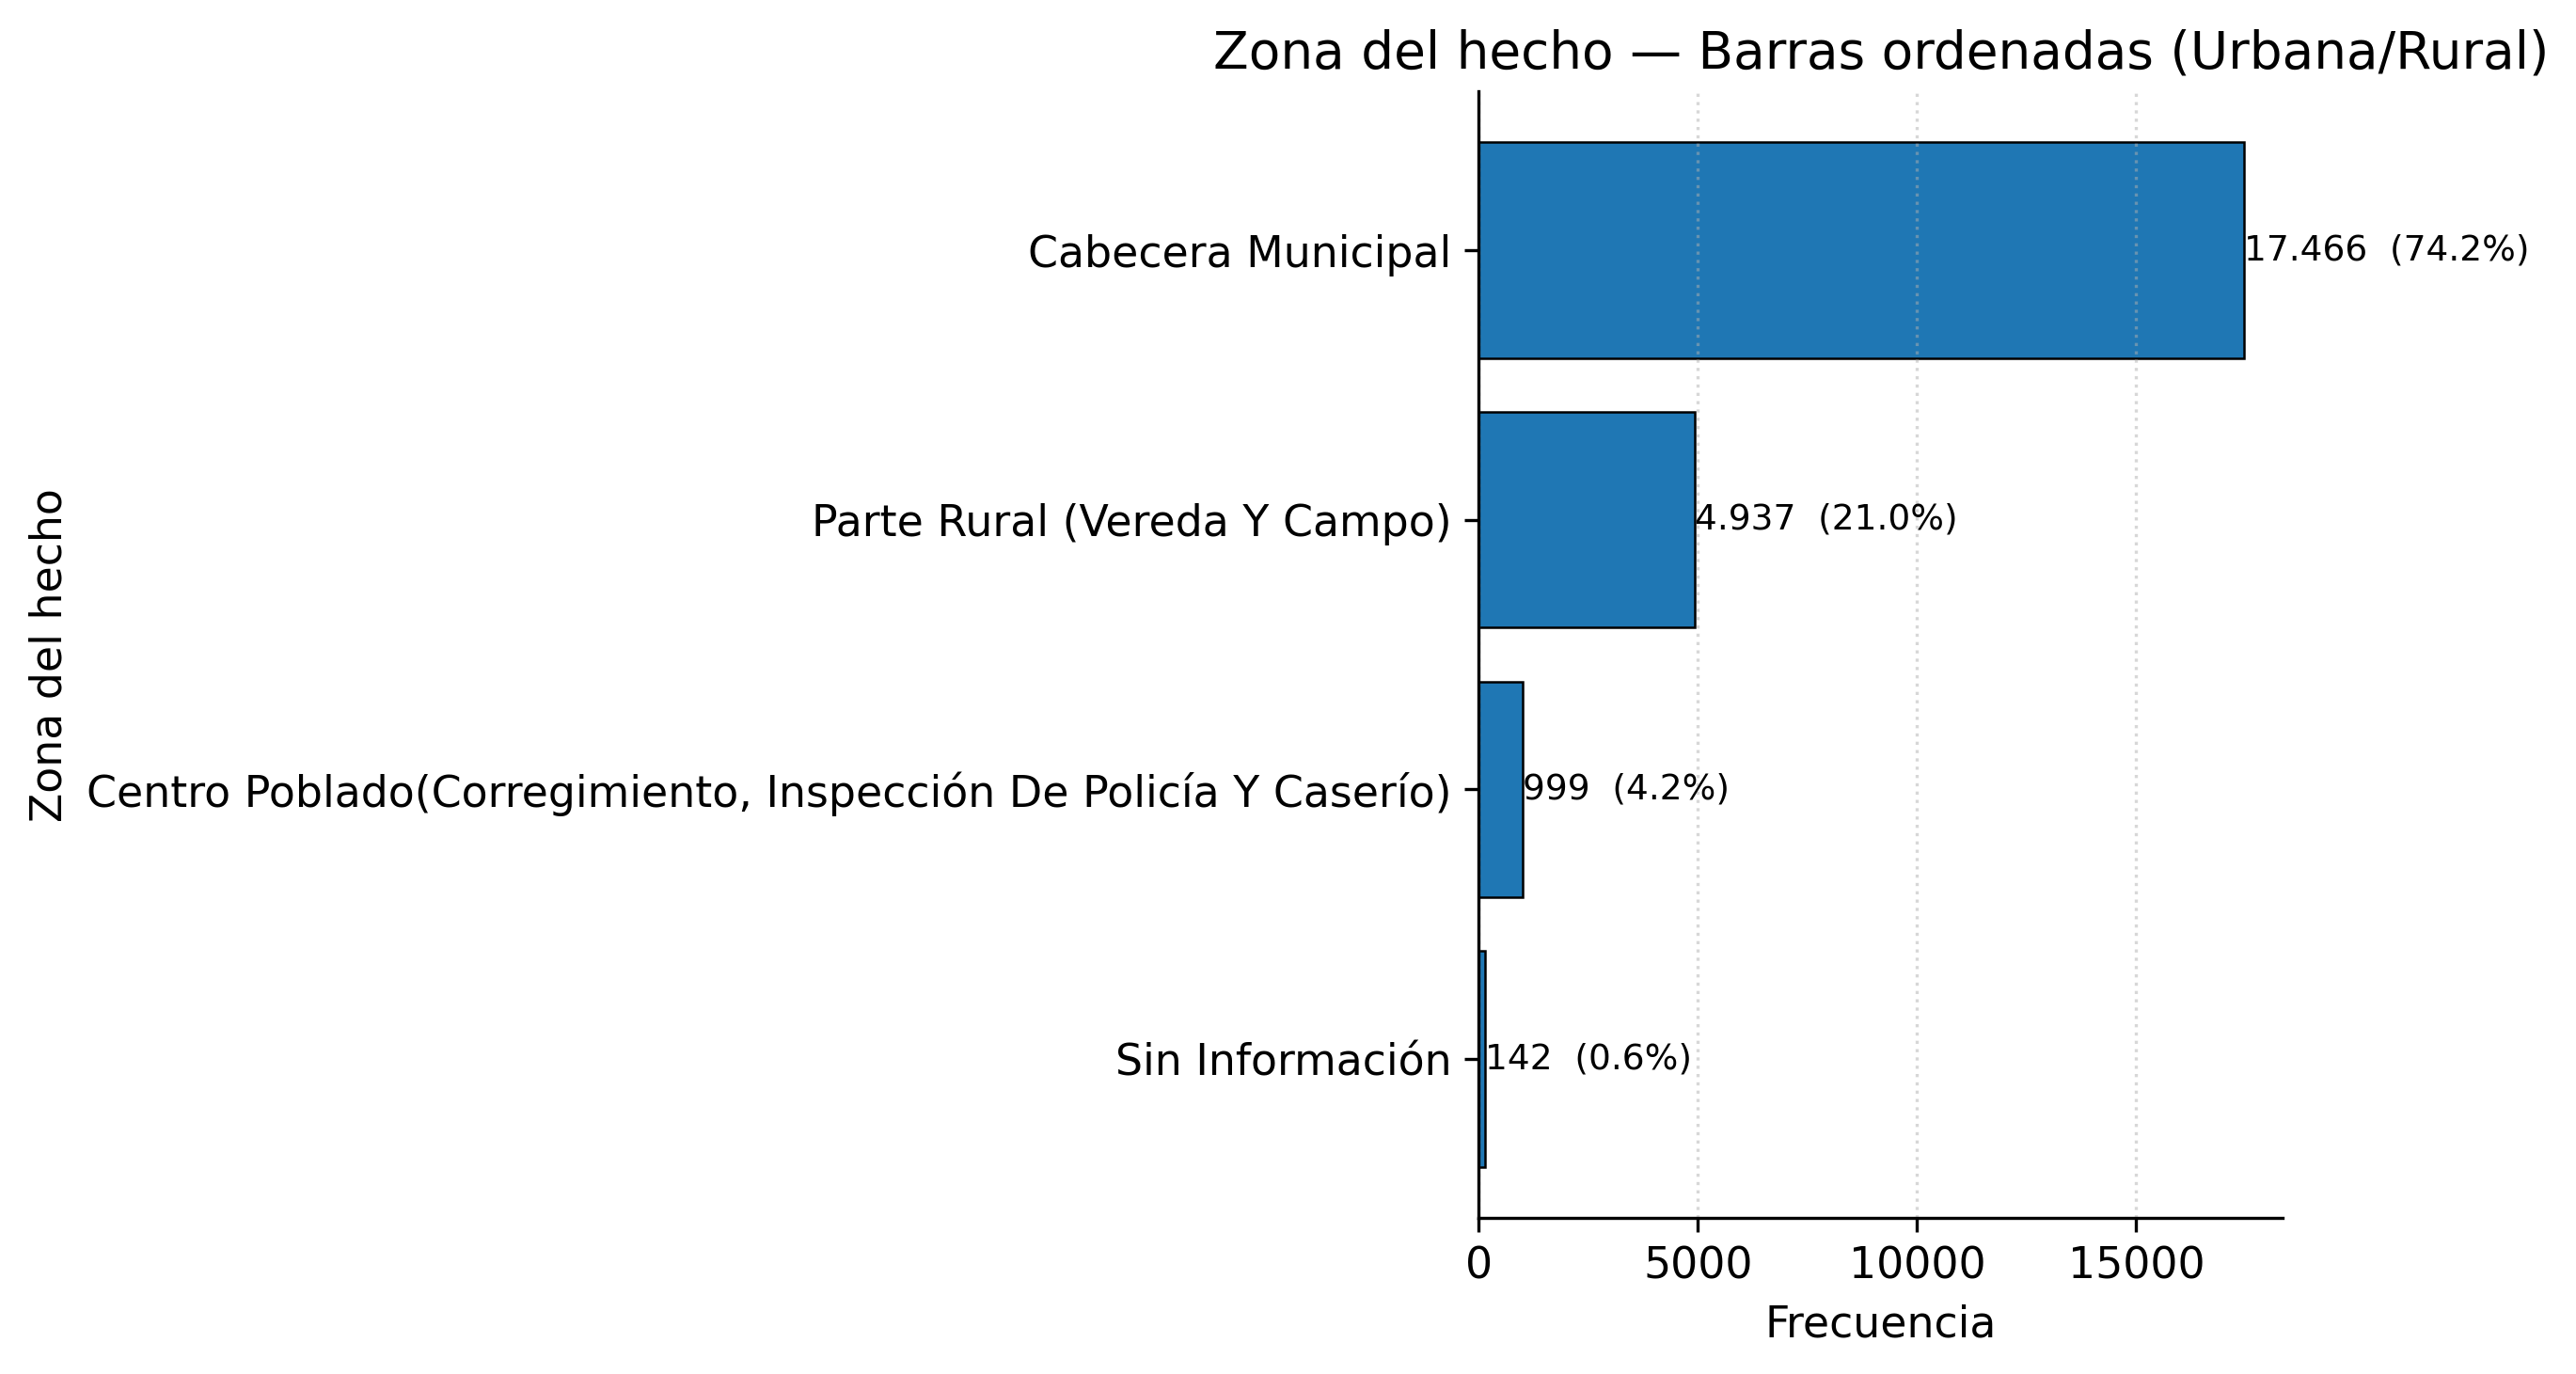

In [83]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

COL = 'zona_del_hecho'  # ajusta al nombre exacto

s = (df[COL].astype(str).str.strip().str.title()
       .replace({'Nan':'Falta_dato','N/a':'Falta_dato'}))
# Normaliza etiquetas comunes
s = s.replace({'Urbano':'Urbana','Rural':'Rural'})

freq = s.value_counts(dropna=False).sort_values(ascending=True)
pct  = (freq/freq.sum()*100).round(1)

fig, ax = plt.subplots(figsize=(9,5), dpi=300)
ax.barh(freq.index, freq.values, edgecolor='black', linewidth=0.6)
for i,(v,p) in enumerate(zip(freq.values, pct.values)):
    ax.text(v, i, f'{v:,.0f}  ({p:.1f}%)'.replace(',', '.'),
            va='center', ha='left', fontsize=9)
ax.set_xlabel('Frecuencia'); ax.set_ylabel('Zona del hecho')
ax.set_title('Zona del hecho — Barras ordenadas (Urbana/Rural)')
ax.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout(); plt.show()


La "Cabecera Municipal" (principal área urbana) concentra tres cuartas partes de todos los casos, con un 74.2% (17,466 hechos). En contraste, la "Parte Rural" y los "Centros Poblados" suman en conjunto el 25.2%, indicando una frecuencia considerablemente menor en áreas no urbanizadas.

### Evolución anual de casos del hecho

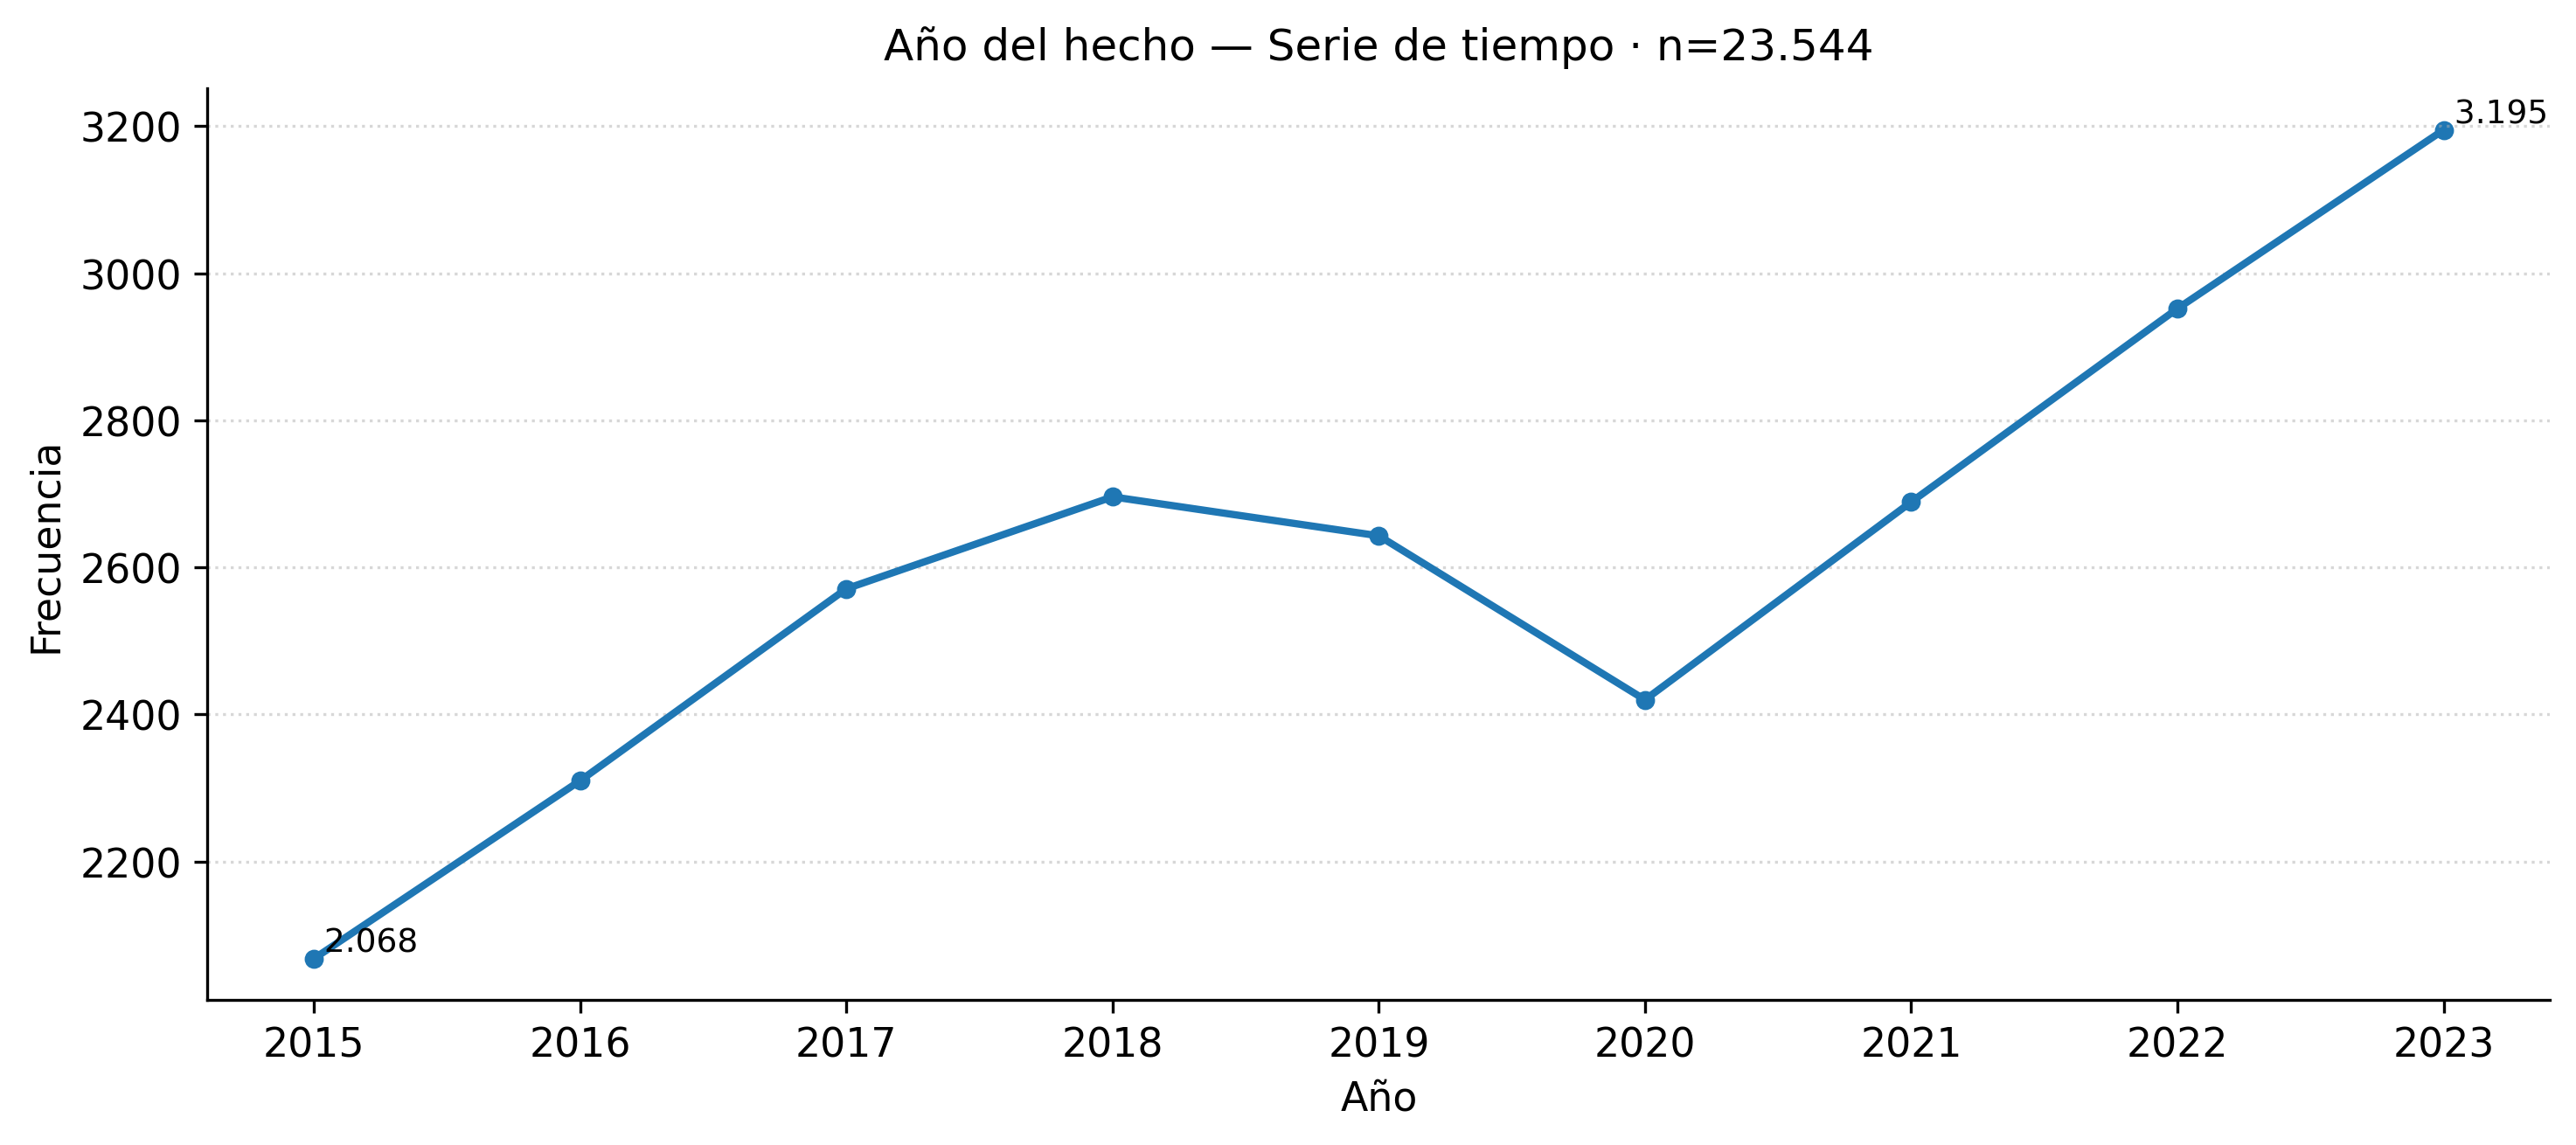

In [84]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# --- Detecta fecha/año ---
if 'fecha_del_hecho' in df.columns:
    fe = pd.to_datetime(df['fecha_del_hecho'], errors='coerce')
    year = fe.dt.year
elif 'anio_del_hecho' in df.columns:
    year = pd.to_numeric(df['anio_del_hecho'], errors='coerce')
elif 'ano_del_hecho' in df.columns:
    year = pd.to_numeric(df['ano_del_hecho'], errors='coerce')
else:
    raise KeyError('No encuentro columna de año. Usa fecha_del_hecho / anio_del_hecho / ano_del_hecho.')

ser = year.dropna().astype(int).value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,4.5), dpi=300)
ax.plot(ser.index, ser.values, linewidth=2)
ax.scatter(ser.index, ser.values, s=18)
for x,y in zip(ser.index, ser.values):
    if y==ser.max() or x in (ser.index.min(), ser.index.max()):
        ax.text(x, y, f' {int(y):,}'.replace(',','.'), va='bottom', fontsize=9)
ax.set_title(f'Año del hecho — Serie de tiempo · n={int(ser.sum()):,}'.replace(',','.'), fontsize=12, pad=8)
ax.set_xlabel('Año'); ax.set_ylabel('Frecuencia')
ax.grid(True, axis='y', linestyle=':', alpha=0.5)
ax.spines[['top','right']].set_visible(False)
plt.tight_layout(); plt.show()


- La gráfica muestra la evolución anual de casos con un claro crecimiento tendencial entre 2015 y 2018, leve descenso en 2019, caída marcada en 2020 y recuperación acelerada desde 2021 hasta alcanzar el máximo en 2023. 
- Se observa un mínimo de 2.068 casos en 2015 y un máximo de 3.195 en 2023, con total n = 23.544. La forma en V alrededor de 2020 sugiere un choque exógeno o un posible subregistro en ese año; no se evalúa estacionalidad porque la unidad temporal es anual. La tendencia posterior supera el nivel pre-choque, lo que indica reanudación y aceleración de la dinámica previa.

### Mapa de calor de casos por departamento y tabla de participación porcentual por departamento

In [85]:
# =========================
# Mapa + Tablas PRO con tus datos (sin GeoJSON)
# =========================
import re, unicodedata
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

# ---------- Render del mapa ----------
try:
    pio.renderers.default = "notebook_connected"
except Exception:
    pio.renderers.default = "browser"

# ---------- 1) Detecta columna de departamento ----------
# 0. Detectar automáticamente la columna de departamento (sin prints)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

dept_col_candidates = [
    'Departamento del hecho DANE','Depto_Nom','Departamento_ocurrencia',
    'Departamento','DEPARTAMENTO','Depto','departamento'
]

dept_col = next((c for c in dept_col_candidates if c in df.columns), None)
if dept_col is None:
    matches = [c for c in df.columns if 'depart' in c.lower()]
    if not matches:
        raise KeyError("No se encontró columna de departamento.")
    dept_col = matches[0]


# ---------- 2) Verifica columnas lat/lon de tu base ----------
assert {'latitud','longitud'}.issubset(df.columns), "Faltan columnas 'latitud' y 'longitud'"

# ---------- 3) Limpieza y agregación ----------
# Excluye 'Sin información' si existe
df_clean = df[df[dept_col].astype(str).ne("Sin información")].copy()

# Agrega por departamento: centroides desde TUS coordenadas y conteo
map_data = (df_clean.groupby(dept_col, dropna=False)
            .agg(lat=('latitud','mean'),
                 lon=('longitud','mean'),
                 casos=(dept_col,'size'))
            .reset_index())

# Etiquetas y tamaño de burbuja
def _title(s): 
    s = str(s).strip()
    # normaliza uso de mayúsculas en preposiciones frecuentes
    s = re.sub(r'\b(de|del|la|y)\b', lambda m: m.group(0).lower(), s.title(), flags=re.I)
    return s

map_data['dept_clean'] = map_data[dept_col].map(_title)
map_data['size_norm']  = np.log1p(map_data['casos']) * 6

# ---------- 4) Mapa (usa scatter_map si está disponible; si no, fallback a scatter_mapbox) ----------
try:
    fig = px.scatter_map(
        map_data,
        lat="lat", lon="lon",
        size="size_norm", size_max=28,
        color="casos", color_continuous_scale="Viridis",
        hover_name="dept_clean",
        hover_data={"casos":":,", "lat":False, "lon":False, "size_norm":False},
        zoom=5, center=dict(lat=4.6, lon=-74.1),
        map_style="open-street-map",
        title=f"Presuntos suicidios por departamento — Total: {map_data['casos'].sum():,} casos"
    )
except Exception:
    fig = px.scatter_mapbox(
        map_data,
        lat="lat", lon="lon",
        size="size_norm", size_max=28,
        color="casos", color_continuous_scale="Viridis",
        hover_name="dept_clean",
        hover_data={"casos":":,", "lat":False, "lon":False, "size_norm":False},
        zoom=5, center=dict(lat=4.6, lon=-74.1),
        mapbox_style="open-street-map",
        title=f"Presuntos suicidios por departamento — Total: {map_data['casos'].sum():,} casos"
    )

fig.update_layout(margin=dict(l=0,r=0,t=60,b=0), height=700, width=950)
fig.show()

# ---------- 5) Tablas PRO ----------
# Tabla completa ordenada + participación y ranking
tbl = (map_data
       .assign(Participación=lambda d: d["casos"] / d["casos"].sum())
       .sort_values("casos", ascending=False, ignore_index=True))
tbl.insert(0, "Rank", tbl.index + 1)
tbl = tbl.rename(columns={dept_col: "Departamento", "casos": "Casos"})

estilo_tbl = (tbl.style
    .format({"Casos": "{:,}", "Participación": "{:.1%}"})
    .hide(axis="index")
    .bar(subset=["Casos"], color="#b3d1ff")
    .background_gradient(subset=["Participación"], cmap="YlOrRd")
    .set_properties(**{"text-align": "left"})
    .set_table_styles([{"selector": "th", "props": [("text-align", "left"), ("font-weight", "500")]}])
)
display(estilo_tbl)

# Top 10 compacto
top10 = tbl.head(10).copy()
estilo_top10 = (top10.style
    .format({"Casos": "{:,}", "Participación": "{:.1%}"})
    .hide(axis="index")
    .set_properties(**{"text-align": "left"})
    .set_table_styles([{"selector": "th", "props": [("text-align", "left"), ("font-weight", "500")]}])
)
display(estilo_top10)

# Resumen numérico
resumen = pd.DataFrame({
    "Total casos": [tbl["Casos"].sum()],
    "N departamentos": [len(tbl)],
    "Promedio casos/depto": [round(tbl["Casos"].mean(), 1)],
    "Mediana": [int(tbl["Casos"].median())]
})
display(resumen.style.format("{:,}").hide(axis="index"))


Rank,Departamento,lat,lon,Casos,dept_clean,size_norm,Participación
1,Antioquia,6.384135,-75.591164,"3,913",Antioquia,49.633891,16.6%
2,"Bogotá, D.C.",4.649251,-74.106992,"3,373","Bogotá, D.C.",48.743126,14.3%
3,Valle del Cauca,3.703794,-76.404540,"2,060",Valle del Cauca,45.785679,8.8%
4,Cundinamarca,4.738987,-74.229318,"1,446",Cundinamarca,43.663486,6.1%
5,Santander,6.900185,-73.273514,"1,140",Santander,42.237962,4.8%
6,Tolima,4.395348,-75.108298,909,Tolima,40.880668,3.9%
7,Norte de Santander,8.008635,-72.782842,837,Norte de Santander,40.386109,3.6%
8,Atlántico,10.904340,-74.828031,809,Atlántico,40.182205,3.4%
9,Nariño,1.270181,-77.584478,755,Nariño,39.768248,3.2%
10,Huila,2.480193,-75.609458,736,Huila,39.615527,3.1%


Rank,Departamento,lat,lon,Casos,dept_clean,size_norm,Participación
1,Antioquia,6.384135,-75.591164,"3,913",Antioquia,49.633891,16.6%
2,"Bogotá, D.C.",4.649251,-74.106992,"3,373","Bogotá, D.C.",48.743126,14.3%
3,Valle del Cauca,3.703794,-76.404540,"2,060",Valle del Cauca,45.785679,8.8%
4,Cundinamarca,4.738987,-74.229318,"1,446",Cundinamarca,43.663486,6.1%
5,Santander,6.900185,-73.273514,"1,140",Santander,42.237962,4.8%
6,Tolima,4.395348,-75.108298,909,Tolima,40.880668,3.9%
7,Norte de Santander,8.008635,-72.782842,837,Norte de Santander,40.386109,3.6%
8,Atlántico,10.904340,-74.828031,809,Atlántico,40.182205,3.4%
9,Nariño,1.270181,-77.584478,755,Nariño,39.768248,3.2%
10,Huila,2.480193,-75.609458,736,Huila,39.615527,3.1%


Total casos,N departamentos,Promedio casos/depto,Mediana
"23,541",33,713.4,536


# Análisis Bivariado

## Preparación del EDA bivariado: Limpieza y estandarización de variables categóricas

In [2]:
import pandas as pd
from IPython.display import display

# Cargar los datos
url = "https://raw.githubusercontent.com/jthowinsson/Suicidio_Colombia/main/Presuntos_Suicidios_con_Coor.csv"
df = pd.read_csv(url, encoding="utf-8")

# Guardar nombres originales
nombres_originales = df.columns.tolist()

# Función para limpiar nombres de columnas
def limpiar_nombres(cols):
    cols = cols.astype(str)
    # Quitar tildes
    mapping_tildes = str.maketrans("áéíóúÁÉÍÓÚ", "aeiouAEIOU")
    cols = cols.str.translate(mapping_tildes)
    # A minúsculas
    cols = cols.str.lower()
    # Reemplazar cualquier carácter no alfanumérico por guion bajo
    cols = cols.str.replace(r'[^a-zA-Z0-9]+', '_', regex=True)
    # Limpiar guiones bajos extra al inicio/final
    cols = cols.str.strip('_')
    return cols

# Aplicar limpieza
df.columns = limpiar_nombres(df.columns)

# Guardar nombres limpios
nombres_limpios = df.columns.tolist()

# Crear tabla de comparación
tabla = pd.DataFrame({
    'Nombre original': nombres_originales,
    'Nombre estandarizado': nombres_limpios
})

# Agregar la fuente como fila final (pie de página dentro de la tabla)
fuente = pd.DataFrame([[
    '<em>Fuente: <a href="https://www.datos.gov.co/Justicia-y-Derecho/Presuntos-Suicidios-Colombia-2015-a-2024-Cifras-de/f75u-mirk/about_data" target="_blank">datos.gov.co</a></em>',
    ''
]], columns=['Nombre original', 'Nombre estandarizado'])

tabla_final = pd.concat([tabla, fuente], ignore_index=True)

# Mostrar tabla con estilo (sin fuente en el caption)
display(tabla_final.style
        .set_caption("Mapeo de nombres de columnas y Estandarización")
        .set_table_attributes('style="border-collapse: collapse; width: 100;"')
        .set_properties(**{
            'border': '1px solid #ddd',
            'padding': '10px',
            'font-size': '14px',
            'text-align': 'left'
        })
        .set_table_styles([
            {'selector': 'caption',
             'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#333'), ('margin-bottom', '10px')]},
            {'selector': 'th',
             'props': [('background-color', '#1f77b4'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'tr:nth-child(even):not(:last-child)',
             'props': [('background-color', '#f7f7f7')]},
            {'selector': 'tr:last-child',
             'props': [('font-style', 'italic'), ('color', '#555'), ('font-size', '12px'), ('background-color', '#f9f9f9'), ('border-top', '2px solid #eee')]},
            {'selector': 'td, th',
             'props': [('padding', '8px')]}
        ])
        .hide(axis="index")
)

Nombre original,Nombre estandarizado
ID,id
Año del hecho,a_o_del_hecho
Grupo de edad de la victima,grupo_de_edad_de_la_victima
Grupo Mayor Menor de Edad,grupo_mayor_menor_de_edad
Edad judicial,edad_judicial
Ciclo Vital,ciclo_vital
Sexo de la victima,sexo_de_la_victima
Estado Civil,estado_civil
País de Nacimiento de la Víctima,pais_de_nacimiento_de_la_victima
Escolaridad,escolaridad


### Limpieza y transformación de variables clave para el análisis

In [3]:
# Ejemplo básico
df.dropna(subset=['sexo_de_la_victima', 'a_o_del_hecho', 'grupo_de_edad_de_la_victima'], inplace=True)
df['ano_del_hecho'] = pd.to_numeric(df['a_o_del_hecho'], errors='coerce')

### Por Año del hecho (tendencia anual)

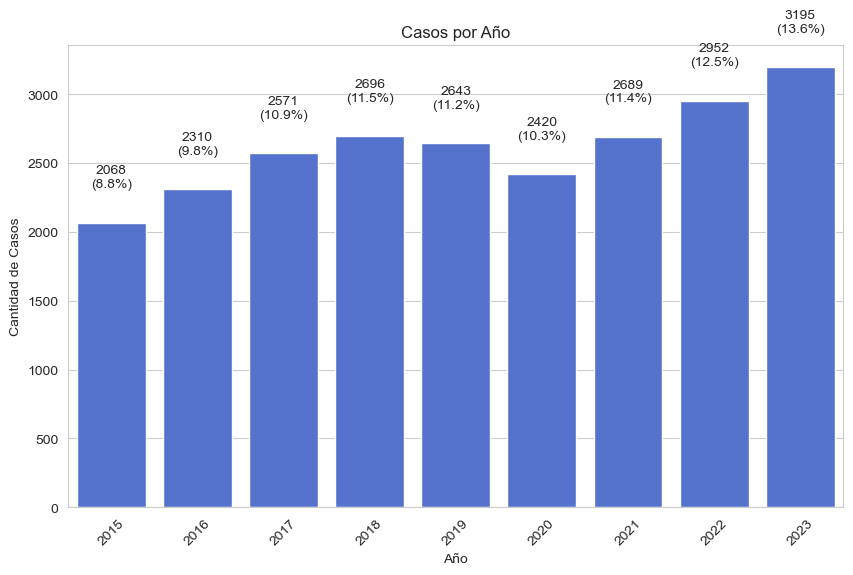

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de conteo con un solo tono de azul
ax = sns.countplot(
    data=df,
    x='a_o_del_hecho',
    order=sorted(df['a_o_del_hecho'].dropna().astype(int).unique()),
    color='royalblue'  # Usar un tono de azul
)

plt.title('Casos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=45)

# Obtener los valores de frecuencia
counts = df['a_o_del_hecho'].value_counts().sort_index()

# Obtener el total de casos para calcular los porcentajes
total = counts.sum()

# Mostrar las frecuencias absolutas y porcentajes en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01 * total,  # Ajustar la posición vertical del texto
        f'{int(height)}\n({height / total:.1%})',  # Frecuencia absoluta y porcentaje
        ha="center",
        va="bottom"
    )

plt.show()


### Por Departamento (Top 10)

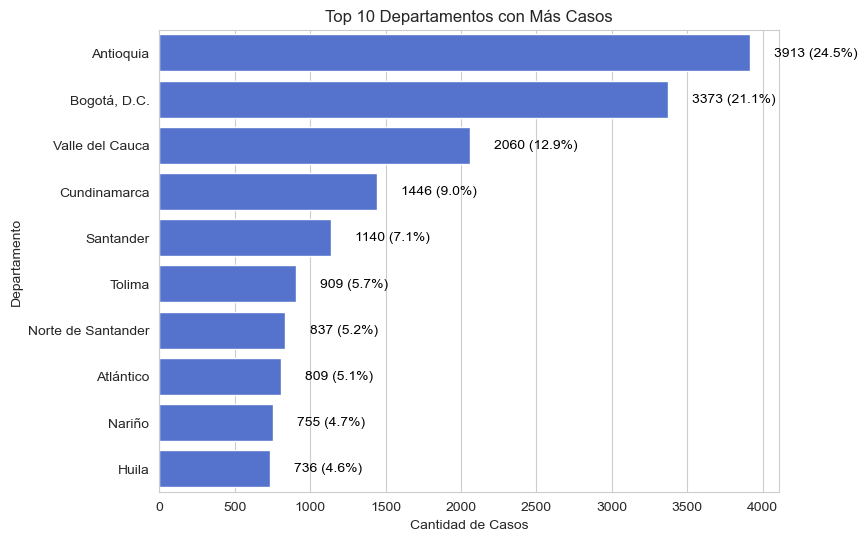

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los 10 departamentos con más casos
top_10_dpto = df['departamento_del_hecho_dane'].value_counts().head(10).index

# Configuración del gráfico
plt.figure(figsize=(8, 6))

# Crear el gráfico de conteo con un solo tono de azul
ax = sns.countplot(
    data=df,
    y='departamento_del_hecho_dane',
    order=top_10_dpto,
    color='royalblue'  # Usar un tono de azul
)

plt.title('Top 10 Departamentos con Más Casos')
plt.xlabel('Cantidad de Casos')
plt.ylabel('Departamento')

# Obtener los valores de frecuencia
counts = df[df['departamento_del_hecho_dane'].isin(top_10_dpto)]['departamento_del_hecho_dane'].value_counts()

# Obtener el total de casos para calcular los porcentajes
total = counts.sum()

# Mostrar las frecuencias absolutas y porcentajes en cada barra
for i, (value, count) in enumerate(counts.items()):
    ax.text(
        count + 0.01 * total,  # Posición horizontal del texto
        i,  # Posición vertical del texto (al lado de la barra)
        f'{count} ({count / total:.1%})',  # Frecuencia absoluta y porcentaje
        va='center',
        color='black'
    )

plt.show()


### Gráfico de barras horizontales para grupo edad de la victima

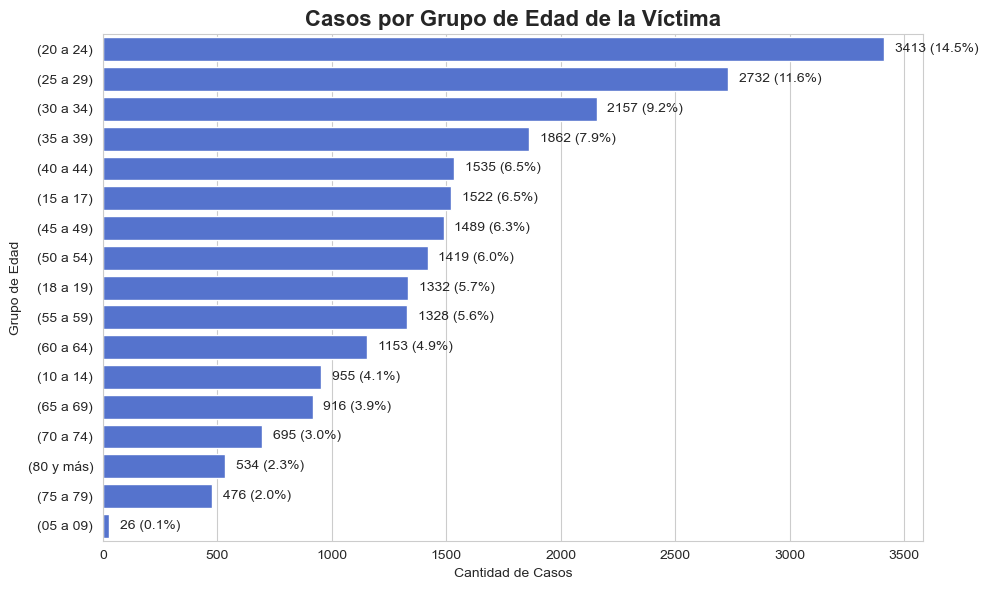

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Orden descendente de los grupos
order = df['grupo_de_edad_de_la_victima'].value_counts().index

# Crear el gráfico de barras horizontales
ax = sns.countplot(data=df, y='grupo_de_edad_de_la_victima', order=order, color='royalblue')

# Títulos
plt.title('Casos por Grupo de Edad de la Víctima', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Casos')
plt.ylabel('Grupo de Edad')

# Calcular total para porcentajes
total = len(df)

# Agregar etiquetas con frecuencia absoluta y porcentaje
for p in ax.patches:
    width = p.get_width()
    plt.text(width + total * 0.002,  # Posición horizontal (un poco después de la barra)
             p.get_y() + p.get_height() / 2,
             f'{int(width)} ({width / total:.1%})',
             ha='left', va='center', fontsize=10)

# Ajustar diseño
plt.tight_layout()
plt.show()

### Sexo vs Grupo de edad

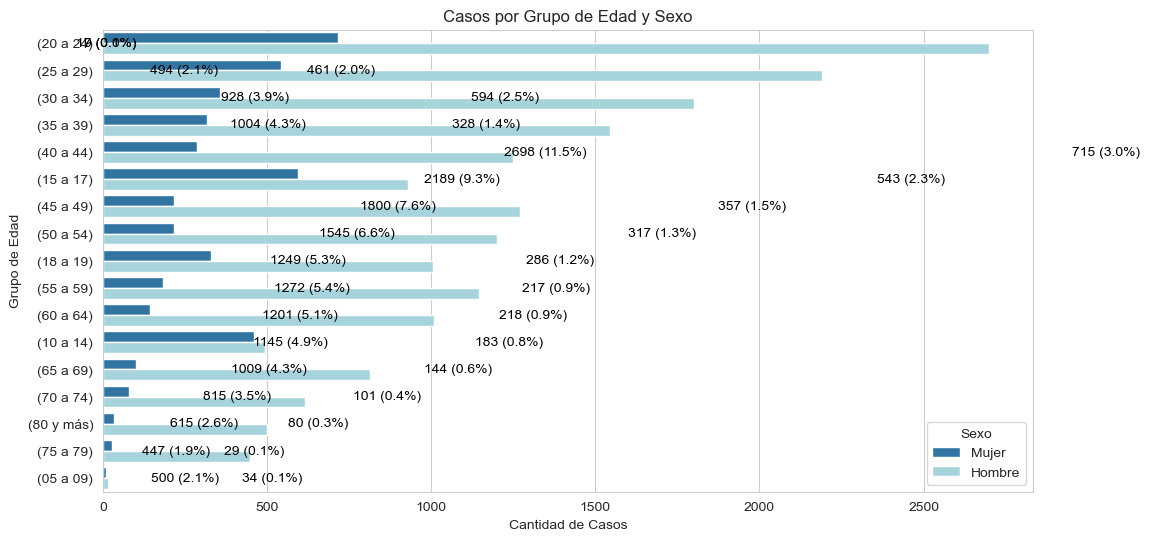

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de conteo con tonos de azul para cada sexo
ax = sns.countplot(
    data=df,
    y='grupo_de_edad_de_la_victima',
    hue='sexo_de_la_victima',
    order=order,
    palette=['#1f77b4', '#9edae5']  # Tonos de azul para cada sexo
)

plt.title('Casos por Grupo de Edad y Sexo')
plt.xlabel('Cantidad de Casos')
plt.ylabel('Grupo de Edad')
plt.legend(title='Sexo')

# Obtener los valores de frecuencia para cada grupo de edad y sexo
counts = df.groupby(['grupo_de_edad_de_la_victima', 'sexo_de_la_victima']).size().unstack()

# Obtener el total de casos para calcular los porcentajes
total = counts.sum().sum()

# Mostrar las frecuencias absolutas y porcentajes en cada barra
for i, edad in enumerate(counts.index):
    # Posición inicial para el texto
    x_pos = 0

    for sexo in counts.columns:
        count = counts.loc[edad, sexo]
        if count > 0:  # Solo mostrar si hay casos
            ax.text(
                x_pos + count / 2,  # Posición horizontal centrada en la barra
                i,  # Posición vertical (al lado de la barra)
                f'{count} ({count / total:.1%})',  # Frecuencia absoluta y porcentaje
                va='center',
                ha='center',
                color='black'
            )
        x_pos += count  # Actualizar la posición horizontal para la siguiente barra

plt.show()


### Tabla: Razones más comunes del suicidio

In [18]:
print("Top 10 razones del suicidio:")
print(df['razon_del_suicidio'].value_counts().head(10))

Top 10 razones del suicidio:
razon_del_suicidio
Sin información                     12444
Enfermedad física o mental           3717
Conflicto con pareja o ex pareja     2493
Desamor                              1538
Económicas                           1453
Otras                                 629
Muerte de un familiar o amigo         341
Abuso de sustancias y alcohol         332
Jurídicas                             137
Escolares - educativas                114
Name: count, dtype: int64
